# Preparing working environment

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allowing modules autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Pandas options
pd.options.display.max_columns = 100

# Import data

In [2]:
# Creating DataFrames for each dataset
df_customers = pd.read_csv("Data\olist_customers_dataset.csv")
df_customers.name = 'Customers'

df_geo = pd.read_csv("Data\olist_geolocation_dataset.csv")
df_geo.name = 'Geolocation'

df_items = pd.read_csv("Data\olist_order_items_dataset.csv")
df_items.name = 'Items'

df_payments = pd.read_csv("Data\olist_order_payments_dataset.csv")
df_payments.name = 'Payments'

df_reviews = pd.read_csv("Data\olist_order_reviews_dataset.csv")
df_reviews.name = 'Reviews'

df_orders = pd.read_csv("Data\olist_orders_dataset.csv")
df_orders.name = 'Orders'

df_products = pd.read_csv("Data\olist_products_dataset.csv")
df_products.name = 'Products'

df_sellers = pd.read_csv("Data\olist_sellers_dataset.csv")
df_sellers.name = 'Sellers'

df_categories = pd.read_csv("Data\product_category_name_translation.csv")
df_categories.name = 'Categories'

In [3]:
# List of dataframes names
l_df = [df_customers, df_geo, df_items, df_payments, df_reviews, 
             df_orders, df_products, df_sellers, df_categories]

<Figure size 720x504 with 0 Axes>

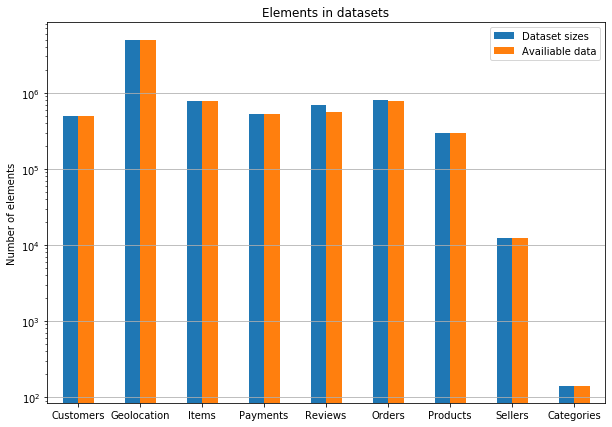

In [4]:
# Dataset sizes
from POLIST_01_scripts import plot_df_sizes

plt.figure(figsize = (10,7))
plot_df_sizes(l_df)
plt.show()

# Merging all data

## Creation of main dataset

In [5]:
# Creation of the main dataset
data = df_customers.copy()
data.sample(10)

customer_id                customer_unique_id  \
67432  75dde0ac9c549d835c347f7b636695d3  484589e917b1ce94f703a34a9a855202   
37039  770713aeb61e544a49c3ef40819b998c  f4a159a21bea9b4e42f166f1a5971d9a   
78689  1bba1b7e613845e24dab84b393f9035b  cad8fdfc1352a1878f05378baeb8b43f   
13524  39b63c587a67ad257832378a0c2d14ff  b5522c0d915588419655dc549f02a4cd   
80064  97b0dc8fcaf85c48c61c57543aa3af99  6ce2d1975a50bbec303aa44178aa7f19   
41252  a6ce61a0375ec7c47769053b811cd750  8820aac0f33eaae7691e5f3ec3a61b07   
97786  3d883de9a4faf6957ea47bf4df0bbc12  4a336f897fa63c4b1690d1825f6b742d   
69357  cbd27e89c7d9f328657dbdfe6206bf6c  2ab1754a3f82d3ddc9ea1e80a2be1e3a   
86602  f2e32479d9ca95098b58d56ab1e41901  b13477f516ec1009a821d33dc26083a2   
2266   bf06e66b68359a1b2b57f347bf4d6a47  26662dc8cc613781a196621d3462d2d1   

       customer_zip_code_prefix          customer_city customer_state  
67432                     13277               valinhos             SP  
37039                     86037               londrina             PR  
78689                     97542               alegrete             RS  
13524                      5859              sao paulo             SP  
80064                      4571              sao paulo             SP  
41252                      8215              sao paulo             SP  
97786                     40355               salvador             BA  
69357                      3377              sao paulo             SP  
86602                     13457  santa barbara d'oeste             SP  
2266                       5541              sao paulo             SP

customer_id : key to the order dataset

customer_unique_id : unique identifier of a customer

In [6]:
# Size of the dataset
data.shape

(99441, 5)

In [7]:
# Missing data
data[data['customer_id'].isna()]

Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

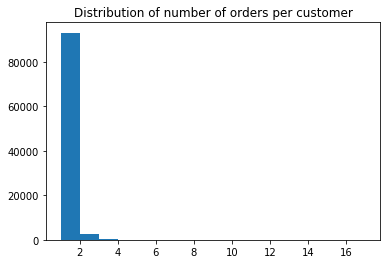

In [8]:
# Number of orders per unique id
df_gr_ = data.groupby(by = 'customer_unique_id', as_index = False).agg({'customer_id' : 'count'})
plt.hist(
    df_gr_['customer_id'],
    bins = df_gr_['customer_id'].max()-1
)
plt.title('Distribution of number of orders per customer')
plt.show()

In [9]:
df_gr_['customer_id'].value_counts(sort = False)

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: customer_id, dtype: int64

## Merging orders

In [10]:
df_orders.sample(5)

order_id                       customer_id  \
92734  468aecdb830aefb386337516a5edaa71  70d5de1ef2fba225d499156e5b8c0e4b   
61981  05ad33706a0ad42482ba7f17236d4bba  f66a0a5603fb1d09eee7fe496b1024ba   
2961   928cc774345b405181cc07ab2497e930  8fe6bbc3193663dc50317d188ab5e9ae   
24314  01946da9e2db8bab61d79296c037ee1f  14532f1320645821a6da04e049dc6b53   
73999  47a2809ec3c2d8c1263a2e09fb62cbcf  8e2c656d2fe9f0d003a5507c15fe39ae   

      order_status order_purchase_timestamp    order_approved_at  \
92734    delivered      2017-04-13 20:53:11  2017-04-15 20:25:08   
61981    delivered      2017-10-11 09:27:38  2017-10-11 09:46:17   
2961     delivered      2017-10-28 10:26:14  2017-10-28 10:45:43   
24314    delivered      2018-01-06 17:48:40  2018-01-06 18:06:39   
73999    delivered      2018-02-02 19:29:48  2018-02-02 20:12:00   

      order_delivered_carrier_date order_delivered_customer_date  \
92734          2017-04-17 11:06:42           2017-05-11 07:51:25   
61981          2017-10-11 19:14:14           2017-10-18 19:58:39   
2961           2017-10-31 17:49:41           2017-11-07 18:51:26   
24314          2018-01-08 17:42:45           2018-01-25 19:41:06   
73999          2018-02-09 00:43:01           2018-02-23 20:37:13   

      order_estimated_delivery_date  
92734           2017-05-10 00:00:00  
61981           2017-11-01 00:00:00  
2961            2017-11-30 00:00:00  
24314           2018-02-06 00:00:00  
73999           2018-03-12 00:00:00

In [11]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [12]:
# converting dates to timestamps
for c in df_orders.columns[-5:]:
    df_orders[c] = pd.to_datetime(df_orders[c], errors = 'coerce', 
                                  format = '%Y-%m-%d %H:%M:%S')

In [13]:
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Delivery times

In [14]:
# Number of days between purchase and delivery
df_orders['delivery_time'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['delivery_time'] = df_orders['delivery_time'].astype('timedelta64[D]')
df_orders['delivery_time'].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


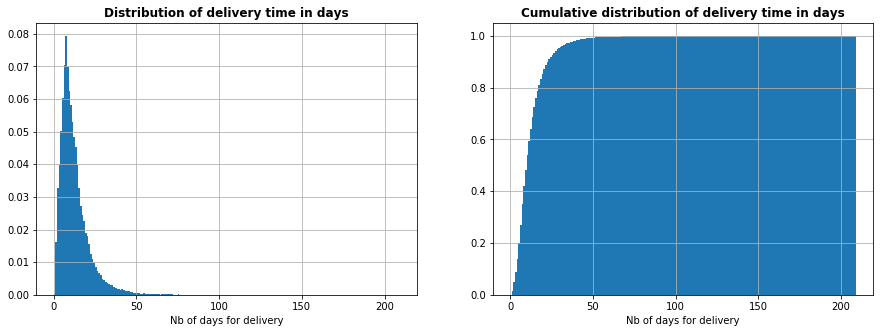

In [15]:
# Plotting delivery times
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(df_orders['delivery_time'], bins = 209, density = True)
plt.title('Distribution of delivery time in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.subplot(122)
plt.hist(df_orders['delivery_time'], bins = 209, density = True, cumulative = True)
plt.title('Cumulative distribution of delivery time in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.show()

In [16]:
def return_quartile(x, serie, q_list):

    if x <= q_list[0]:
        quartile = 'Q1'
    elif x <= q_list[1]:
        quartile = 'Q2'
    elif x <= q_list[2]:
        quartile = 'Q3'
    else :
        quartile = 'Q4'
    
    return(quartile)

In [17]:
# Column giving the quartile of delivery time
q1 = df_orders['delivery_time'].quantile(0.25)
q2 = df_orders['delivery_time'].quantile(0.50)
q3 = df_orders['delivery_time'].quantile(0.75)

df_orders['delivery_time_quantile'] = df_orders['delivery_time'].apply(
    lambda x : return_quartile(x, df_orders['delivery_time'], [q1, q2, q3]))

In [18]:
# Delays for undelivered orders
df_orders[
    (df_orders['order_status'] != 'delivered') &
    (~df_orders['delivery_time'].isna())
]

order_id                       customer_id  \
2921   1950d777989f6a877539f53795b4c3c3  1bccb206de9f0f25adc6871a1bcf77b2   
8791   dabf2b0e35b423f94618bf965fcb7514  5cdec0bb8cbdf53ffc8fdc212cd247c6   
58266  770d331c84e5b214bd9dc70a10b829d0  6c57e6119369185e575b36712766b0ef   
59332  8beb59392e21af5eb9547ae1a9938d06  bf609b5741f71697f65ce3852c5d2623   
92636  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   
94399  2c45c33d2f9cb8ff8b1c86cc28c11c30  de4caa97afa80c8eeac2ff4c8da5b72e   

      order_status order_purchase_timestamp   order_approved_at  \
2921      canceled      2018-02-19 19:48:52 2018-02-19 20:56:05   
8791      canceled      2016-10-09 00:56:52 2016-10-09 13:36:58   
58266     canceled      2016-10-07 14:52:30 2016-10-07 15:07:10   
59332     canceled      2016-10-08 20:17:50 2016-10-09 14:34:30   
92636     canceled      2016-10-03 21:01:41 2016-10-04 10:18:57   
94399     canceled      2016-10-09 15:39:56 2016-10-10 10:40:49   

      order_delivered_carrier_date order_delivered_customer_date  \
2921           2018-02-20 19:57:13           2018-03-21 22:03:51   
8791           2016-10-13 13:36:59           2016-10-16 14:36:59   
58266          2016-10-11 15:07:11           2016-10-14 15:07:11   
59332          2016-10-14 22:45:26           2016-10-19 18:47:43   
92636          2016-10-25 12:14:28           2016-11-08 10:58:34   
94399          2016-10-14 10:40:50           2016-11-09 14:53:50   

      order_estimated_delivery_date  delivery_time delivery_time_quantile  
2921                     2018-03-09           30.0                     Q4  
8791                     2016-11-30            7.0                     Q2  
58266                    2016-11-29            7.0                     Q2  
59332                    2016-11-30           10.0                     Q2  
92636                    2016-11-25           35.0                     Q4  
94399                    2016-12-08           30.0                     Q4

### Estimated delivery times

In [19]:
# Estimated delivery time
df_orders['estimated_time'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']
df_orders['estimated_time'] = df_orders['estimated_time'].astype('timedelta64[D]')
df_orders['estimated_time'].describe()

count    99441.000000
mean        23.403958
std          8.829562
min          1.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
Name: estimated_time, dtype: float64

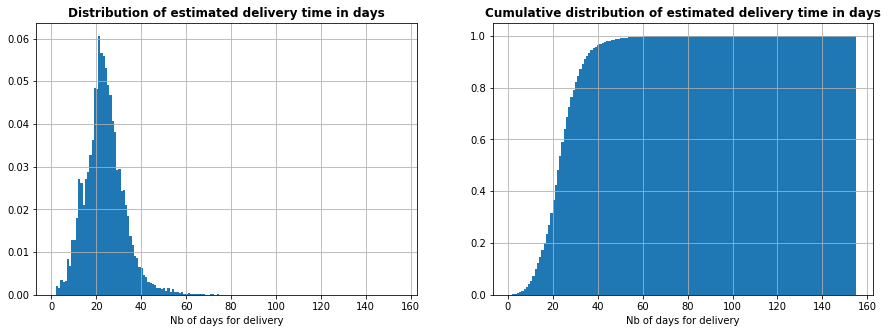

In [20]:
# Plotting estimated times
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(df_orders['estimated_time'], bins = 155, density = True)
plt.title('Distribution of estimated delivery time in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.subplot(122)
plt.hist(df_orders['estimated_time'], bins = 155, density = True, cumulative = True)
plt.title('Cumulative distribution of estimated delivery time in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.show()

In [21]:
# Column giving the quartile of delivery time
q1 = df_orders['estimated_time'].quantile(0.25)
q2 = df_orders['estimated_time'].quantile(0.50)
q3 = df_orders['estimated_time'].quantile(0.75)

df_orders['estimated_time_quantile'] = df_orders['estimated_time'].apply(
    lambda x : return_quartile(x, df_orders['estimated_time'], [q1, q2, q3]))

### Order delays

In [22]:
# Difference between estimated and actual delivery date
df_orders['delivery_delay'] = df_orders['order_delivered_customer_date'] - df_orders['order_estimated_delivery_date']
df_orders['delivery_delay'] = df_orders['delivery_delay'].astype('timedelta64[D]')
df_orders['delivery_delay'].describe()

count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

In [23]:
# Column giving the quartile of delivery time
q1 = df_orders['delivery_delay'].quantile(0.25)
q2 = df_orders['delivery_delay'].quantile(0.50)
q3 = df_orders['delivery_delay'].quantile(0.75)

df_orders['delivery_delay_quantile'] = df_orders['delivery_delay'].apply(
    lambda x : return_quartile(x, df_orders['delivery_delay'], [q1, q2, q3]))

In [24]:
df_orders[
    (df_orders['order_status'] != 'delivered') &
    (~df_orders['delivery_delay'].isna())
]

order_id                       customer_id  \
2921   1950d777989f6a877539f53795b4c3c3  1bccb206de9f0f25adc6871a1bcf77b2   
8791   dabf2b0e35b423f94618bf965fcb7514  5cdec0bb8cbdf53ffc8fdc212cd247c6   
58266  770d331c84e5b214bd9dc70a10b829d0  6c57e6119369185e575b36712766b0ef   
59332  8beb59392e21af5eb9547ae1a9938d06  bf609b5741f71697f65ce3852c5d2623   
92636  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   
94399  2c45c33d2f9cb8ff8b1c86cc28c11c30  de4caa97afa80c8eeac2ff4c8da5b72e   

      order_status order_purchase_timestamp   order_approved_at  \
2921      canceled      2018-02-19 19:48:52 2018-02-19 20:56:05   
8791      canceled      2016-10-09 00:56:52 2016-10-09 13:36:58   
58266     canceled      2016-10-07 14:52:30 2016-10-07 15:07:10   
59332     canceled      2016-10-08 20:17:50 2016-10-09 14:34:30   
92636     canceled      2016-10-03 21:01:41 2016-10-04 10:18:57   
94399     canceled      2016-10-09 15:39:56 2016-10-10 10:40:49   

      order_delivered_carrier_date order_delivered_customer_date  \
2921           2018-02-20 19:57:13           2018-03-21 22:03:51   
8791           2016-10-13 13:36:59           2016-10-16 14:36:59   
58266          2016-10-11 15:07:11           2016-10-14 15:07:11   
59332          2016-10-14 22:45:26           2016-10-19 18:47:43   
92636          2016-10-25 12:14:28           2016-11-08 10:58:34   
94399          2016-10-14 10:40:50           2016-11-09 14:53:50   

      order_estimated_delivery_date  delivery_time delivery_time_quantile  \
2921                     2018-03-09           30.0                     Q4   
8791                     2016-11-30            7.0                     Q2   
58266                    2016-11-29            7.0                     Q2   
59332                    2016-11-30           10.0                     Q2   
92636                    2016-11-25           35.0                     Q4   
94399                    2016-12-08           30.0                     Q4   

       estimated_time estimated_time_quantile  delivery_delay  \
2921             17.0                      Q1            12.0   
8791             51.0                      Q4           -45.0   
58266            52.0                      Q4           -46.0   
59332            52.0                      Q4           -42.0   
92636            52.0                      Q4           -17.0   
94399            59.0                      Q4           -29.0   

      delivery_delay_quantile  
2921                       Q4  
8791                       Q1  
58266                      Q1  
59332                      Q1  
92636                      Q1  
94399                      Q1

C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


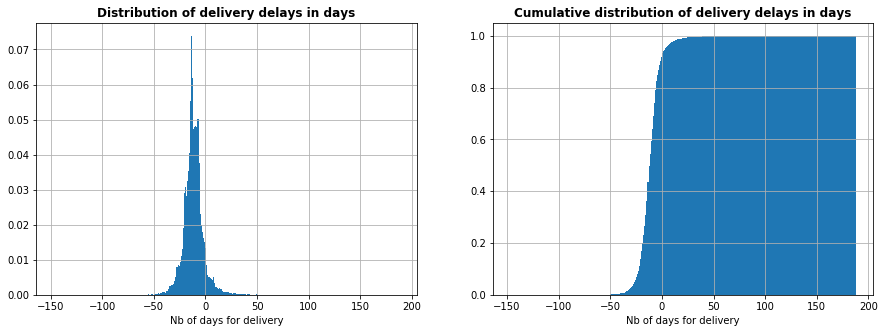

In [25]:
# Plotting delivery delays
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(df_orders['delivery_delay'], bins = 335, density = True)
plt.title('Distribution of delivery delays in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.subplot(122)
plt.hist(df_orders['delivery_delay'], bins = 335, density = True, cumulative = True)
plt.title('Cumulative distribution of delivery delays in days', fontweight = 'bold')
plt.xlabel('Nb of days for delivery')
plt.grid(True)

plt.show()

### Merge

In [26]:
# Missing customer_ids
from POLIST_01_scripts import check_keys
check_keys(df_orders, df_customers, 'customer_id')

(0, 0)

In [27]:
# Merge
data = data.merge(
    df_orders,
    how = 'outer',
    on = 'customer_id'
) 

data.shape

(99441, 18)

## Reviews

In [28]:
df_reviews.sample(5)

review_id                          order_id  \
88290  c5c3c71042a1777807e583887d96e970  fbb4e83be54abdb39f7b0673acc6beb2   
80403  97dc17352b950e38f6908f3429ce5699  b1e0c67bbf6c050cb6b1eb71e3ccdb37   
32596  3dbc3361e86d69258289b4d732ad1419  0f9482b2e24effff84c7c84001592e55   
86492  02562c087efcecdeddcf4a2a48de9979  93534e882600a1678683a51e57bb1883   
73006  e53510ef51e1758010e8e8eec355ddd6  62a0e822dd605871a747ee39a9131574   

       review_score review_comment_title  \
88290             5                  NaN   
80403             4                  NaN   
32596             5                  NaN   
86492             4                  NaN   
73006             4                  NaN   

                                  review_comment_message review_creation_date  \
88290                                                NaN  2018-02-17 00:00:00   
80403                                                NaN  2017-12-28 00:00:00   
32596  Amei meu produto, chegou perfeito, bem antes d...  2017-06-25 00:00:00   
86492                                                NaN  2018-02-10 00:00:00   
73006                                                NaN  2017-06-13 00:00:00   

      review_answer_timestamp  
88290     2018-02-20 12:04:18  
80403     2017-12-28 22:31:05  
32596     2017-06-26 13:34:14  
86492     2018-02-11 02:15:49  
73006     2017-06-16 18:33:42

In [29]:
df_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [30]:
df_reviews.count()/len(df_reviews)

review_id                  1.00000
order_id                   1.00000
review_score               1.00000
review_comment_title       0.11715
review_comment_message     0.41753
review_creation_date       1.00000
review_answer_timestamp    1.00000
dtype: float64

### Date Conversion and review delays

In [31]:
# converting dates to timestamps
for c in df_reviews.columns[-2:]:
    df_reviews[c] = pd.to_datetime(df_reviews[c], errors = 'coerce', 
                                  format = '%Y-%m-%d %H:%M:%S')

In [32]:
# Creating a column for review delay
df_reviews['review_delay'] = df_reviews['review_answer_timestamp'] - df_reviews['review_creation_date']
df_reviews['review_delay'] = df_reviews['review_delay'].astype('timedelta64[D]')
df_reviews['review_delay'].describe()

count    100000.00000
mean          2.58090
std           9.86328
min           0.00000
25%           1.00000
50%           1.00000
75%           3.00000
max         518.00000
Name: review_delay, dtype: float64

In [33]:
df_reviews[df_reviews['review_answer_timestamp'].isna()]

Empty DataFrame
Columns: [review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, review_delay]
Index: []

In [34]:
df_reviews[df_reviews['review_delay'] == df_reviews['review_delay'].max()]

review_id                          order_id  \
41932  40dad6438b6cbec46d936bec2377778c  bb5849f8ba21da43ffa31ea52ba81b37   

       review_score review_comment_title review_comment_message  \
41932             1                  NaN                    NaN   

      review_creation_date review_answer_timestamp  review_delay  
41932           2017-03-24     2018-08-24 16:46:52         518.0

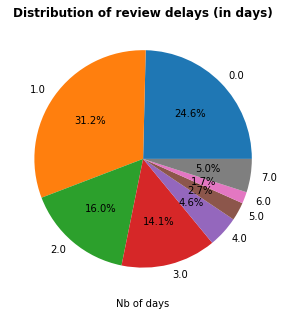

In [35]:
# Plotting review delays
plt.figure(figsize = (5,5))

s_ = np.clip(df_reviews['review_delay'],0,7).value_counts(sort = False).sort_index()

plt.pie(s_, labels = s_.index,
       autopct = lambda x: str(round(x, 1)) + '%' )
plt.title('Distribution of review delays (in days)', fontweight = 'bold')
plt.xlabel('Nb of days')
plt.grid(True)

### Review scores

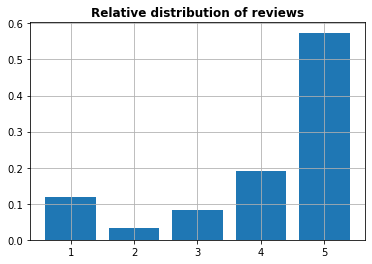

In [36]:
# Distibution of review scores
s_ = df_reviews['review_score'].value_counts(normalize = True, dropna = False)
plt.bar(s_.index, s_.values)
plt.grid(True)
plt.title('Relative distribution of reviews', fontweight = 'bold')
plt.show()

In [37]:
# Creation of binary columns indicating wheter customer has written a comment
df_reviews['review_has_title'] = ~df_reviews['review_comment_title'].isna()
df_reviews['review_has_message'] = ~df_reviews['review_comment_message'].isna()
df_reviews['review_has_title_and_message'] = df_reviews[
    'review_has_title'].astype('int64').apply(lambda x : (str(x))) + df_reviews[
    'review_has_message'].astype('int64').apply(lambda x : (str(x)))

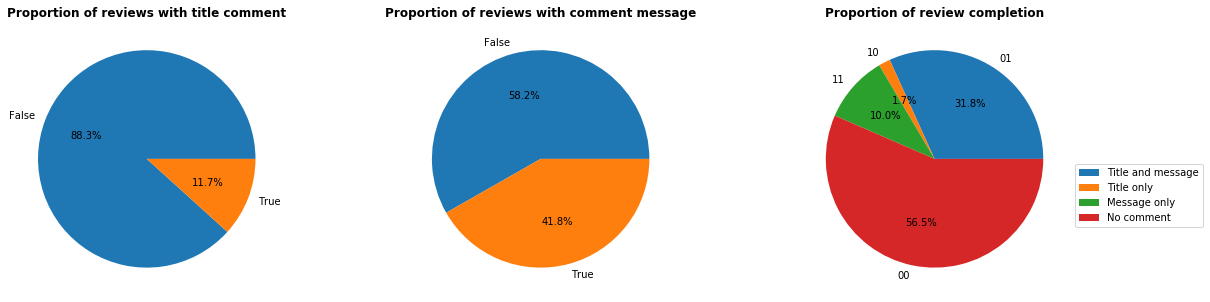

In [38]:
# Plotting
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.pie(df_reviews['review_has_title'].value_counts(),
       labels = df_reviews['review_has_title'].value_counts().index,
       autopct = lambda x: str(round(x, 1)) + '%' )
plt.title('Proportion of reviews with title comment', fontweight = 'bold')

plt.subplot(132)
plt.pie(df_reviews['review_has_message'].value_counts(),
       labels = df_reviews['review_has_message'].value_counts().index,
       autopct = lambda x: str(round(x, 1)) + '%' )
plt.title('Proportion of reviews with comment message', fontweight = 'bold')

plt.subplot(133)
plt.pie(df_reviews['review_has_title_and_message'].value_counts(sort = False),
       labels = df_reviews['review_has_title_and_message'].value_counts(sort = False).index,
       autopct = lambda x: str(round(x, 1)) + '%' )
plt.legend(
    ['Title and message', 'Title only', 'Message only', 'No comment'],
    bbox_to_anchor = (1,0,0,0.5)
)
plt.title('Proportion of review completion', fontweight = 'bold')

plt.show()

## Payments

### Payment methods

In [39]:
df_payments.sample(5)

order_id  payment_sequential payment_type  \
28989  db9184ca76c81f6e6f102cda2b30e12f                   1  credit_card   
16601  4fc24c6e6c09b89f876806e55dc8fcda                   1  credit_card   
35914  5df41d8270624e3bcd155e2803cd3fea                   1       boleto   
89762  281ed84706b4bd965fcc7e842394aaa4                   1       boleto   
5486   46513a6be6229688ac9b3144f995f95a                   1  credit_card   

       payment_installments  payment_value  
28989                     8         111.43  
16601                     1          89.46  
35914                     1         178.12  
89762                     1         119.82  
5486                     10         141.53

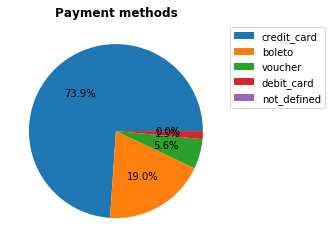

In [40]:
# Payment methods
s_ = df_payments['payment_type'].value_counts()
plt.pie(s_,
       autopct = lambda x: str(round(x, 1)) + '%' )
plt.legend(s_.index,
          bbox_to_anchor = (1,0,0,1))
plt.title('Payment methods', fontweight = 'bold')
plt.show()

In [41]:
# Order with multiple payment installments 
df_payments[df_payments['order_id'] == 'd52140bee663636aa4f6057e50bc06a3']

order_id  payment_sequential payment_type  \
43882  d52140bee663636aa4f6057e50bc06a3                   1  credit_card   

       payment_installments  payment_value  
43882                     3         147.28

payment_installments gives the number of payments choosen by the customer for a given order. 1 line for multiple payments with 1 payment type 

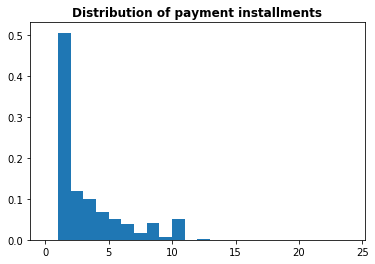

In [42]:
plt.hist(df_payments['payment_installments'], density = True,
        bins = df_payments['payment_installments'].max())
plt.title('Distribution of payment installments', fontweight = 'bold')
plt.show()

### Percentage of total basket

In [43]:
# Order with multiple payment sequential
test_ = df_payments[df_payments['payment_sequential'] > 1]['order_id'].sample().values[0]
df_payments[df_payments['order_id'] == test_]

order_id  payment_sequential payment_type  \
45758  5f9146371506c318a20721d5689dfb57                   2  credit_card   
93828  5f9146371506c318a20721d5689dfb57                   1  credit_card   

       payment_installments  payment_value  
45758                     2          73.48  
93828                     2          73.48

In [44]:
# Adding a columns giving the percentage of total basket paid in payment_sequential
df_payments['payment_total_basket'] = df_payments.groupby(by = 'order_id')['payment_value'].transform('sum')
df_payments['payment_%_of_total_basket'] = df_payments['payment_value'] / df_payments['payment_total_basket']
df_payments[df_payments['order_id'] == test_]

order_id  payment_sequential payment_type  \
45758  5f9146371506c318a20721d5689dfb57                   2  credit_card   
93828  5f9146371506c318a20721d5689dfb57                   1  credit_card   

       payment_installments  payment_value  payment_total_basket  \
45758                     2          73.48                146.96   
93828                     2          73.48                146.96   

       payment_%_of_total_basket  
45758                        0.5  
93828                        0.5

### Customer basket

In [45]:
# Average basket
s_ = df_payments.groupby(by = 'order_id').agg({'payment_value' : 'sum'})['payment_value']
s_.describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

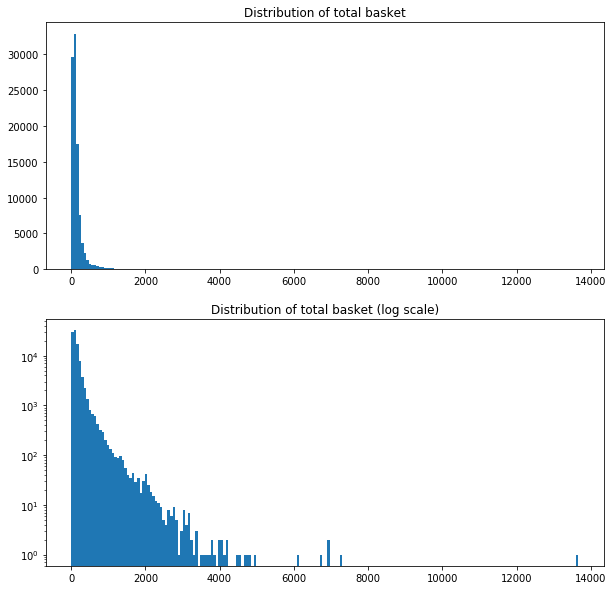

In [46]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.hist(s_, bins = 200)
plt.title('Distribution of total basket')

plt.subplot(212)
plt.hist(s_, bins = 200)
plt.gca().set_yscale('log')
plt.title('Distribution of total basket (log scale)')

plt.show()

## Items

In [47]:
df_items.sample(5)

order_id  order_item_id  \
37773   55b653f93de6e994b6dda90f615c7a8f              1   
9326    1551eb55b3d7c7e38d2f826992446d64              1   
85846   c2fdaa1b60c55ac8d318c4adb4b26373              1   
18568   2aaec06a05dcae79035bc3b85c53d817              1   
101771  e6f98f32bf5e724269a5e9cb2529f2e3              1   

                              product_id                         seller_id  \
37773   8173ca41cdb176462f9ae79821a48404  d566c37fa119d5e66c4e9052e83ee4ea   
9326    2043cae78c8b731c405c7329a05154b2  4830e40640734fc1c52cd21127c341d4   
85846   500870614ddcf5bd84f7d26861026c8a  92eb0f42c21942b6552362b9b114707d   
18568   c6a212ed7d57767d94530e11fabcd06f  48fb026ed7455a42f5d3e9390ed5088e   
101771  990246075b83e422c5b4b9005578a8dd  c0563dd588b775f2e37747ef6ad6c92c   

        shipping_limit_date   price  freight_value  
37773   2018-05-07 13:15:21   35.90          15.23  
9326    2018-03-21 13:30:55   69.00          16.45  
85846   2018-08-17 11:25:13   11.87           7.39  
18568   2017-08-23 23:10:14   47.99          12.35  
101771  2017-10-20 12:28:22  139.90          13.32

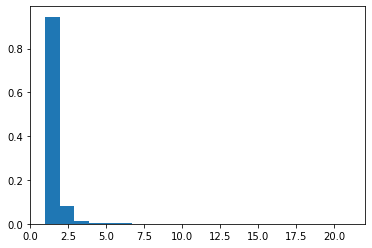

In [48]:
# Number of items per order
df_gr_ = df_items.groupby(by = 'order_id').agg({'order_item_id': 'count',
                                                'price' : 'sum',
                                                'freight_value' : 'sum'})

plt.hist(df_gr_['order_item_id'], 
         bins = df_gr_['order_item_id'].max(),
         density = True
)
plt.show()

## Merge reviews, payments and items

In [49]:
# Missing order_ids
for df in l_df[2:5]:
    print(df.name, check_keys(df_orders, df, 'order_id'))

Items (0, 775)
Payments (0, 1)
Reviews (0, 0)


In [50]:
df_orders[~df_orders['order_id'].isin(df_payments['order_id'])]

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   

      order_status order_purchase_timestamp   order_approved_at  \
30710    delivered      2016-09-15 12:16:38 2016-09-15 12:16:38   

      order_delivered_carrier_date order_delivered_customer_date  \
30710          2016-11-07 17:11:53           2016-11-09 07:47:38   

      order_estimated_delivery_date  delivery_time delivery_time_quantile  \
30710                    2016-10-04           54.0                     Q4   

       estimated_time estimated_time_quantile  delivery_delay  \
30710            18.0                      Q1            36.0   

      delivery_delay_quantile  
30710                      Q4

In [51]:
df_orders[~df_orders['order_id'].isin(df_items['order_id'])]['order_status'].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [52]:
# Merge
for df in l_df[2:5]:
    data = data.merge(
        df,
        how = 'outer',
        on = 'order_id'
    )
    
data.shape

(119151, 40)

## Merge products and sellers

In [53]:
df_products.sample(5)

product_id product_category_name  \
7567   6961fec72a8f56ba5eff6d01b51f4d39      moveis_decoracao   
28664  83343727db272f1b63942c26cbdfd92f         esporte_lazer   
1493   394e7e390f3282732faa3a73a6033c3a             papelaria   
23110  2ae49b2b174231324f42d783f93d0edc    relogios_presentes   
26215  da1b02f306fa97908dcdcb07c854aba6            brinquedos   

       product_name_lenght  product_description_lenght  product_photos_qty  \
7567                  54.0                       649.0                 1.0   
28664                 52.0                       390.0                 1.0   
1493                  51.0                       749.0                 2.0   
23110                 55.0                       463.0                 2.0   
26215                 51.0                      1223.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
7567             6900.0              100.0               25.0   
28664            1400.0               27.0               12.0   
1493              200.0               16.0                7.0   
23110             258.0               18.0               10.0   
26215             250.0               17.0               15.0   

       product_width_cm  
7567               25.0  
28664              49.0  
1493               27.0  
23110              17.0  
26215              12.0

In [54]:
# Adding a column for product volume
df_products['product_volume_cm3'] = df_products.iloc[:,-3:].prod(axis = 1)

In [55]:
df_sellers.sample(5)

seller_id  seller_zip_code_prefix  \
2856  5d378b73ab7dd6f0418d743e5dcb0bd1                    1026   
710   9c0e69c7bf2619675bbadf47b43f655a                   12230   
170   95ec4458365c4d11f452ccf538377619                   13481   
773   fe1bbc5feda5c8979a8a1b3b2512d5a6                   38680   
2655  165b1235e9e9942cb5fae67103576fb0                   14020   

              seller_city seller_state  
2856            sao paulo           SP  
710   sao jose dos campos           SP  
170               limeira           SP  
773                arinos           MG  
2655       ribeirao preto           SP

In [56]:
print(df_products.name, check_keys(df_items, df_products, 'product_id'))
print(df_sellers.name, check_keys(df_items, df_sellers, 'seller_id'))

Products (0, 0)
Sellers (0, 0)


In [57]:
data = data.merge(
    df_products,
    how = 'outer',
    on = 'product_id'
)

data = data.merge(
    df_sellers,
    how = 'outer',
    on = 'seller_id'
)

data.shape

(119151, 52)

## Merge Categories

In [58]:
df_categories.sample(5)

product_category_name product_category_name_english
5          esporte_lazer                sports_leisure
0           beleza_saude                 health_beauty
20                 audio                         audio
21      fashion_calcados                 fashion_shoes
46                 artes                           art

In [59]:
check_keys(df_products, df_categories, 'product_category_name')

(0, 623)

In [60]:
df_products[
    ~df_products['product_category_name'].isin(df_categories['product_category_name'])
]['product_category_name'].value_counts(dropna = False)

NaN                                              610
portateis_cozinha_e_preparadores_de_alimentos     10
pc_gamer                                           3
Name: product_category_name, dtype: int64

### Adding english category names

In [61]:
df_products[
    (~df_products['product_category_name'].isin(df_categories['product_category_name'])) &
    (~df_products['product_category_name'].isna())
]

product_id  \
1628   0105b5323d24fc655f73052694dbbb3a   
5821   6fd83eb3e0799b775e4f946bd66657c0   
7325   5d923ead886c44b86845f69e50520c3e   
7478   6727051471a0fc4a0e7737b57bff2549   
8819   bed164d9d628cf0593003389c535c6e0   
11039  1220978a08a6b29a202bc015b18250e9   
14266  ae62bb0f95af63d64eae5f93dddea8d3   
16182  1954739d84629e7323a4295812a3e0ec   
16930  dbe520fb381ad695a7e1f2807d20c765   
17800  c7a3f1a7f9eef146cc499368b578b884   
18610  7afdd65f79f63819ff5bee328843fa37   
26890  a4756663d007b0cd1af865754d08d968   
29919  cb9d764f38ee4d0c00af64d5c388f837   

                               product_category_name  product_name_lenght  \
1628                                        pc_gamer                 59.0   
5821   portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325   portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                        pc_gamer                 60.0   
8819   portateis_cozinha_e_preparadores_de_alimentos                 54.0   
11039  portateis_cozinha_e_preparadores_de_alimentos                 46.0   
14266  portateis_cozinha_e_preparadores_de_alimentos                 59.0   
16182  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
16930                                       pc_gamer                 60.0   
17800  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
18610  portateis_cozinha_e_preparadores_de_alimentos                 48.0   
26890  portateis_cozinha_e_preparadores_de_alimentos                 60.0   
29919  portateis_cozinha_e_preparadores_de_alimentos                 57.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
1628                        621.0                 4.0            2839.0   
5821                        280.0                 1.0            1200.0   
7325                        284.0                 1.0            1200.0   
7478                       1532.0                 3.0             650.0   
8819                        382.0                 2.0             850.0   
11039                       280.0                 1.0            1200.0   
14266                       927.0                 1.0           10600.0   
16182                       792.0                 4.0             750.0   
16930                       840.0                 6.0             800.0   
17800                      1372.0                 5.0            7350.0   
18610                       305.0                 1.0             750.0   
26890                      1304.0                 4.0             650.0   
29919                       306.0                 1.0             625.0   

       product_length_cm  product_height_cm  product_width_cm  \
1628                19.0               16.0              18.0   
5821                25.0               33.0              25.0   
7325                25.0               33.0              25.0   
7478                16.0               22.0              20.0   
8819                30.0               21.0              22.0   
11039               25.0               33.0              25.0   
14266               40.0               20.0              38.0   
16182               30.0               30.0              30.0   
16930               18.0               22.0              22.0   
17800               40.0               30.0              23.0   
18610               20.0               20.0              20.0   
26890               22.0                6.0              14.0   
29919               28.0               27.0              24.0   

       product_volume_cm3  
1628               5472.0  
5821              20625.0  
7325              20625.0  
7478               7040.0  
8819              13860.0  
11039             20625.0  
14266             30400.0  
16182             27000.0  
16930              8712.0  
17800             27600.0  
18610              8000.0  
26890              1848.0  
29919             181

In [62]:
df_categories[df_categories['product_category_name'].str.contains('cozinha')]

product_category_name  \
26  moveis_cozinha_area_de_servico_jantar_e_jardim   

              product_category_name_english  
26  kitchen_dining_laundry_garden_furniture

In [63]:
df_categories['product_category_name_english'].sort_values().values

array(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo',
       'computers', 'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff',
       'costruction_tools_garden', 'costruction_tools_tools',
       'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics',
       'fashio_female_clothing', 'fashion_bags_accessories',
       'fashion_childrens_clothes', 'fashion_male_clothing',
       'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach',
       'fixed_telephony', 'flowers', 'food', 'food_drink',
       'furniture_bedroom', 'furniture_decor', 'furniture_living_room',
       'furniture_mattress_and_upholstery', 'garden_tools',
       'health_beauty', 'home

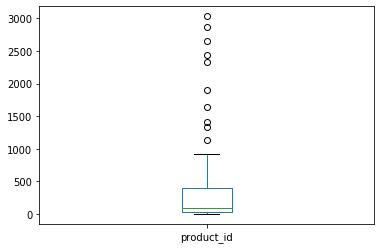

In [64]:
# Number of products per category
df_gr_ = df_products.groupby(by = 'product_category_name').agg({'product_id' : 'count'})
df_gr_.plot.box()

In [65]:
df_gr_.describe()

product_id
count    73.000000
mean    443.027397
std     735.904904
min       1.000000
25%      31.000000
50%      94.000000
75%     400.000000
max    3029.000000

In [66]:
df_temp = pd.DataFrame(
    [['portateis_cozinha_e_preparadores_de_alimentos', 'portable_kitchen_and_food_preparers'],
     ['pc_gamer','pc_gamer']],
    columns = df_categories.columns
)

df_categories = df_categories.append(
    df_temp, ignore_index = True
)

### Merge

In [67]:
data = data.merge(
    df_categories,
    how = 'outer',
    on = 'product_category_name'
)

data.shape

(119151, 53)

## Merge customer and seller geolocation

In [68]:
df_geo.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
248728                        11013       -23.939894       -46.339711   
718079                        55034        -8.288493       -35.987775   
910175                        88338       -26.975778       -48.639795   
35686                          2721       -23.476714       -46.670867   
314033                        13573       -22.056333       -47.908829   

          geolocation_city geolocation_state  
248728              santos                SP  
718079             caruaru                PE  
910175  balneario camboriu                SC  
35686            sao paulo                SP  
314033          sao carlos                SP

In [69]:
df_geo.shape

(1000163, 5)

In [70]:
# Number of lines per zip code
df_geo['geolocation_zip_code_prefix'].value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
73990       1
87307       1
72450       1
24877       1
38198       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [71]:
# Example for zipcode 24220
df_geo[df_geo['geolocation_zip_code_prefix'] == 24220]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                        24220       -22.905817       -43.106989   
470811                        24220       -22.902306       -43.112545   
470812                        24220       -22.904567       -43.110491   
470820                        24220       -22.902575       -43.109192   
470821                        24220       -22.907500       -43.106170   
...                             ...              ...              ...   
474265                        24220       -22.904023       -43.111683   
474266                        24220       -22.905393       -43.100512   
474269                        24220       -22.906420       -43.104933   
474270                        24220       -22.909701       -43.108452   
474273                        24220       -22.903291       -43.113633   

       geolocation_city geolocation_state  
470805          niteroi                RJ  
470811          niteroi                RJ  
470812          niteroi                RJ  
470820          niteroi                RJ  
470821          niteroi                RJ  
...                 ...               ...  
474265          niteroi                RJ  
474266          niterói                RJ  
474269          niteroi                RJ  
474270          niteroi                RJ  
474273          niteroi                RJ  

[1146 rows x 5 columns]

In [72]:
#Creating a single line per zipcode
df_geo_gr = df_geo.groupby(by = 'geolocation_zip_code_prefix', as_index = False).agg(
    {'geolocation_lat' : 'mean',
     'geolocation_lng' : 'mean',
     'geolocation_city' : 'first',
     'geolocation_state' : 'first'}
)

df_geo_gr.shape

(19015, 5)

### Customers location

In [73]:
# Customers with unknown zip code
check_keys(df_geo_gr, df_customers, 
           l_key = 'geolocation_zip_code_prefix',
           r_key = 'customer_zip_code_prefix'
          )[0]

278

In [74]:
# Unknown zipcodes
df_customers[
    ~df_customers['customer_zip_code_prefix'].isin(
    df_geo_gr['geolocation_zip_code_prefix'])
]['customer_zip_code_prefix'].unique()

array([72300, 11547, 64605, 72465,  7729, 72904, 35408, 78554, 73369,
        8980, 29949, 65137, 28655, 73255, 28388,  6930, 71676, 64047,
       61906, 83210, 71919, 36956, 35242, 72005, 29718, 41347, 70324,
       70686, 72341, 12332, 70716, 71905, 75784, 73082, 71884, 71574,
       72238, 71996, 76968, 71975, 72595, 72017, 72596, 67105, 25840,
       72002, 72821, 85118, 25919, 95853, 72583, 68511, 70701, 71591,
       72535, 95572, 73090, 72242, 86135, 70316, 73091, 41098, 58734,
       73310, 71810, 72280,  7430, 73081, 70333, 72268, 35104, 72455,
       72237, 17390, 76897, 84623, 70702, 72760, 73088, 29196, 36596,
       57254, 71995, 73093, 75257, 48504, 83843, 62625, 37005, 73401,
       49870, 13307, 28617, 73402, 56327, 71976, 72587, 85958, 19740,
       77404, 44135, 28120, 72863, 87323, 87511, 72440, 72243, 65830,
       71261, 28575,  2140, 71551, 72023, 28160, 55027, 43870, 94370,
       38710, 42716, 36248, 71593, 71953, 72549, 72457, 56485, 71590,
       93602,  7412,

In [75]:
data = data.merge(
    df_geo_gr.iloc[:,:3].rename(columns = lambda x: x.replace('geolocation','customer')),
    how = 'left',
    on = 'customer_zip_code_prefix'
)

data.shape

(119151, 55)

### Sellers location

In [76]:
check_keys(df_geo_gr, df_sellers, 
           l_key = 'geolocation_zip_code_prefix',
           r_key = 'seller_zip_code_prefix'
          )[0]

7

In [77]:
df_sellers[
    ~df_sellers['seller_zip_code_prefix'].isin(
    df_geo_gr['geolocation_zip_code_prefix'])
].iloc[:,-3:]

seller_zip_code_prefix      seller_city seller_state
473                    82040         curitiba           PR
791                    91901     porto alegre           RS
1672                   72580         brasilia           DF
1931                    2285        sao paulo           SP
2182                    7412            aruja           SP
2986                   71551         brasilia           DF
3028                   37708  pocos de caldas           MG

In [78]:
data = data.merge(
    df_geo_gr.rename(columns = lambda x: x.replace('geolocation','seller')).iloc[:,:3],
    how = 'left',
    on = 'seller_zip_code_prefix'
)

data.shape

(119151, 57)

In [79]:
# Storing dataset
data.to_pickle('data_merged.pkl')

# Aggregation per customer unique id

In [80]:
data.sample(5)

customer_id                customer_unique_id  \
59728   953685e0b65f9e97278a0c2caea55e1c  b44c8d45a4be6501f69e0e2d154ad06b   
56972   bbeb2d228004bb46b49889f614f80c48  38a3c2eb6f3a9c08efff963c5a551a7c   
85833   7ec4a5cfdf2614eac98521fa08afbfc4  105386e05405db999b39121700b6be71   
63148   0e896e4e843f99d1fa8220549ce4024f  f17619a8db648adb2dd504e94873839a   
109658  1c00c415c262d2dc99886b3b272bbd4f  66b6a4cf3097402c20573dd906846461   

        customer_zip_code_prefix customer_city customer_state  \
59728                      55016       caruaru             PE   
56972                      17012         bauru             SP   
85833                       2233     sao paulo             SP   
63148                      51190        recife             PE   
109658                     66040         belem             PA   

                                order_id order_status  \
59728   57dd83bf1021dc5613a4e19544a99915    delivered   
56972   233f0d86db908dbeb6c2ae5675b31e71    delivered   
85833   b6e1870851fc18da0ef1cafe7b7360c1    delivered   
63148   de09e6c4676182436c36ae4f25bd78bc    delivered   
109658  7af96e4998e17a87ca43a79b93e112c9    delivered   

       order_purchase_timestamp   order_approved_at  \
59728       2018-04-16 21:18:45 2018-04-17 21:10:19   
56972       2017-11-15 20:55:55 2017-11-15 21:10:33   
85833       2018-08-03 18:21:50 2018-08-03 18:35:08   
63148       2017-11-03 17:19:11 2017-11-03 17:30:54   
109658      2017-04-07 19:18:25 2017-04-07 19:30:14   

       order_delivered_carrier_date order_delivered_customer_date  \
59728           2018-04-19 21:28:40           2018-05-14 14:52:38   
56972           2017-11-16 14:17:50           2017-11-21 13:58:32   
85833           2018-08-06 14:07:00           2018-08-09 14:32:59   
63148           2017-11-07 19:26:57           2017-11-20 18:18:26   
109658          2017-04-10 11:19:32           2017-04-20 12:45:43   

       order_estimated_delivery_date  delivery_time delivery_time_quantile  \
59728                     2018-05-15           27.0                     Q4   
56972                     2017-12-11            5.0                     Q1   
85833                     2018-08-13            5.0                     Q1   
63148                     2017-11-30           17.0                     Q4   
109658                    2017-05-15           12.0                     Q3   

        estimated_time estimated_time_quantile  delivery_delay  \
59728             28.0                      Q3            -1.0   
56972             25.0                      Q3           -20.0   
85833              9.0                      Q1            -4.0   
63148             26.0                      Q3           -10.0   
109658            37.0                      Q4           -25.0   

       delivery_delay_quantile  order_item_id  \
59728                       Q4            1.0   
56972                       Q1            1.0   
85833                       Q4            1.0   
63148                       Q3            1.0   
109658                      Q1            1.0   

                              product_id                         seller_id  \
59728   d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
56972   ba9943916136c9959e24f71bdae28faa  8c16d1f32a54d92897cc437244442e1b   
85833   32ff30bce9752963c889b69a33b0e84a  9b013e03b2ab786505a1d3b5c0756754   
63148   0f59f164d6792e0c4d1757501850cf47  ed4acab38528488b65a9a9c603ff024a   
109658  8d1cfc0463b545928bfb4e589e017bd4  aae3bfea055532c57fb453ed3ec80b30   

        shipping_limit_date   price  freight_value  payment_sequential  \
59728   2018-04-23 21:10:19  119.00          31.52                 2.0   
56972   2017-11-21 21:10:33   44.90          15.10                 1.0   
85833   2018-08-09 18:32:07  200.00           8.66                 1.0   
63148   2017-11-09 17:30:45   35.99          17.63                 1.0   
109658  2017-04-13 19:30:14   62.80          24.93                 1.0   

     

## Number of orders

In [81]:
# Total number of unique customers
len(data['customer_unique_id'].unique())

96096

In [82]:
# Aggregating number of orders
data_cust = data.groupby(by = 'customer_unique_id').agg(
    {'customer_id' : 'nunique'}
)

data_cust.rename(columns = {'customer_id':'nb_of_orders'}, inplace = True)

## Customer Adress

In [83]:
# Checking unique zipcode, city and state per customer unique id
df_gr_ = data.groupby(by = 'customer_unique_id').agg(
    {'customer_zip_code_prefix' : 'nunique',
     'customer_city' : 'nunique',
     'customer_state' : 'nunique'
    }
)

df_gr_.max()

customer_zip_code_prefix    3
customer_city               3
customer_state              3
dtype: int64

In [84]:
# Customers with multiple zipcodes
df_gr_[df_gr_['customer_zip_code_prefix'] == 3]

customer_zip_code_prefix  customer_city  \
customer_unique_id                                                          
3e43e6105506432c953e165fb2acf44c                         3              1   
9832ae2f7d3e5fa4c7a1a06e9551bc61                         3              2   
b9badb100ff8ecc16a403111209e3a06                         3              2   
d44ccec15f5f86d14d6a2cfa67da1975                         3              3   

                                  customer_state  
customer_unique_id                                
3e43e6105506432c953e165fb2acf44c               1  
9832ae2f7d3e5fa4c7a1a06e9551bc61               1  
b9badb100ff8ecc16a403111209e3a06               2  
d44ccec15f5f86d14d6a2cfa67da1975               3

Only 4 customers out of 96k have multiple adress (have moved, ordered for a third party, have several residences, etc)
Won't significatly change ML ==> deletion

In [85]:
# Dropping customers with several adresses
drop_list = df_gr_[df_gr_['customer_zip_code_prefix'] == 3].index.to_list()

data_cust.drop(
    index = drop_list ,
    inplace = True
)

data = data[
    ~data['customer_unique_id'].isin(drop_list)
]

In [86]:
# Aggregating customer adress
data_cust = data_cust.join(
    data.groupby(by = 'customer_unique_id').agg(
    {'customer_city' : 'first',
     'customer_state' : 'first',
     'customer_lat' : 'first',
     'customer_lng' : 'first'})
)

## Customer's first order

In [87]:
# Date of the first order
df_gr_ = data.groupby(by = 'customer_unique_id').agg(
    {'order_purchase_timestamp' : 'first'}
)

In [88]:
# Aggregating in customer database
data_cust = data_cust.join(df_gr_)

## Customer's orders status

In [89]:
# Proportions of orders per status
df_gr_ = data.groupby(by = ['customer_unique_id', 'order_status'], as_index = False).agg({'order_id' : 'count'})

# Number of orders per status
df_pivot = df_gr_.pivot(index = 'customer_unique_id',
             columns = 'order_status',
             values = 'order_id').fillna(0)

# Proportion per status
df_pivot['sum'] = df_pivot.sum(axis = 1)
for c in df_pivot.columns[:-1]:
    df_pivot[c] = df_pivot[c] / df_pivot['sum']
    df_pivot[c].apply(lambda x : round(x,2))
    df_pivot.rename(columns = {c : '%_' + c}, inplace = True)

In [90]:
df_pivot[df_pivot['%_delivered'] < 1]

order_status                      %_approved  %_canceled  %_created  \
customer_unique_id                                                    
00172711b30d52eea8b313a7f2cced02         0.0         0.5        0.0   
001ae44fa04911a9e9577356dce6c63c         0.0         0.0        0.0   
0029bd580d3012618731f5abb174a07f         0.0         0.0        0.0   
004ad212c650c96c8a48f30855a7bcb8         0.0         0.0        0.0   
004b45ec5c64187465168251cd1c9c2f         0.0         0.0        0.0   
...                                      ...         ...        ...   
ffc4233210eac4ec1711a8b847196d4e         0.0         1.0        0.0   
ffca77d46c6d7d815549a5e4482dba2f         0.0         0.0        0.0   
ffdde6e4dcb6ec3a882cfc6cddef7996         0.0         0.0        0.0   
ffe6305176b9431a3eda3cf8904d7eb7         0.0         0.0        0.0   
fffcc512b7dfecaffd80f13614af1d16         0.0         0.0        0.0   

order_status                      %_delivered  %_invoiced  %_processing  \
customer_unique_id                                                        
00172711b30d52eea8b313a7f2cced02          0.5         0.0           0.0   
001ae44fa04911a9e9577356dce6c63c          0.0         0.0           0.0   
0029bd580d3012618731f5abb174a07f          0.0         0.0           0.0   
004ad212c650c96c8a48f30855a7bcb8          0.0         0.0           0.0   
004b45ec5c64187465168251cd1c9c2f          0.5         0.0           0.0   
...                                       ...         ...           ...   
ffc4233210eac4ec1711a8b847196d4e          0.0         0.0           0.0   
ffca77d46c6d7d815549a5e4482dba2f          0.0         0.0           0.0   
ffdde6e4dcb6ec3a882cfc6cddef7996          0.0         0.0           1.0   
ffe6305176b9431a3eda3cf8904d7eb7          0.0         0.0           0.0   
fffcc512b7dfecaffd80f13614af1d16          0.0         0.0           0.0   

order_status                      %_shipped  %_unavailable  sum  
customer_unique_id                                               
00172711b30d52eea8b313a7f2cced02        0.0            0.0  2.0  
001ae44fa04911a9e9577356dce6c63c        1.0            0.0  1.0  
0029bd580d3012618731f5abb174a07f        1.0            0.0  1.0  
004ad212c650c96c8a48f30855a7bcb8        0.0            1.0  1.0  
004b45ec5c64187465168251cd1c9c2f        0.5            0.0  2.0  
...                                     ...            ...  ...  
ffc4233210eac4ec1711a8b847196d4e        0.0            0.0  1.0  
ffca77d46c6d7d815549a5e4482dba2f        1.0            0.0  1.0  
ffdde6e4dcb6ec3a882cfc6cddef7996        0.0            0.0  1.0  
ffe6305176b9431a3eda3cf8904d7eb7        1.0            0.0  1.0  
fffcc512b7dfecaffd80f13614af1d16        1.0            0.0  1.0  

[2936 rows x 9 columns]

In [91]:
df_pivot.count()

order_status
%_approved       96092
%_canceled       96092
%_created        96092
%_delivered      96092
%_invoiced       96092
%_processing     96092
%_shipped        96092
%_unavailable    96092
sum              96092
dtype: int64

In [92]:
# Aggregating proportions per status
data_cust = data_cust.join(
    df_pivot.drop(columns = 'sum')
)

## Aggregating delivery data

In [93]:
# Mean delivery times (actual and estimated) and mean delays
df_gr_ = data.groupby(by = 'customer_unique_id').agg(
    {'delivery_time' : 'mean',
     'estimated_time' : 'mean',
     'delivery_delay' : 'mean'}
)

for c in df_gr_.columns:
    df_gr_.rename(columns = {c : 'mean_' + c}, inplace = True)
    
data_cust = data_cust.join(df_gr_)

In [94]:
for col in ['delivery_time_quantile' , 'estimated_time_quantile', 'delivery_delay_quantile']:
    df_gr_ = data.groupby(
        by = ['customer_unique_id', col],
        as_index = False
    ).agg({'order_id' : 'count'})

    df_pivot = df_gr_.pivot(
        index = 'customer_unique_id',
        columns = col,
        values = 'order_id'
    ).fillna(0)

    df_pivot['sum'] = df_pivot.sum(axis = 1)
    for c in ['Q1', 'Q2', 'Q3', 'Q4']:
        df_pivot[c] = df_pivot[c]/df_pivot['sum']
        df_pivot.rename(columns = {c:'%_'+c+col}, inplace = True)

    data_cust = data_cust.join(df_pivot.drop(columns = ['sum']))

In [95]:
data_cust

nb_of_orders       customer_city  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2             1             cajamar   
0000b849f77a49e4a4ce2b2a4ca5be3f             1              osasco   
0000f46a3911fa3c0805444483337064             1            sao jose   
0000f6ccb0745a6a4b88665a16c9f078             1               belem   
0004aac84e0df4da2b147fca70cf8255             1            sorocaba   
...                                        ...                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684             1             sanharo   
fffea47cd6d3cc0a88bd621562a9d061             1    feira de santana   
ffff371b4d645b6ecea244b27531430a             1               sinop   
ffff5962728ec6157033ef9805bacc48             1  bom jesus do norte   
ffffd2657e2aad2907e67c3e9daecbeb             1         campo largo   

                                 customer_state  customer_lat  customer_lng  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2             SP    -23.340235    -46.830140   
0000b849f77a49e4a4ce2b2a4ca5be3f             SP    -23.559115    -46.787626   
0000f46a3911fa3c0805444483337064             SC    -27.542880    -48.633426   
0000f6ccb0745a6a4b88665a16c9f078             PA     -1.312214    -48.483159   
0004aac84e0df4da2b147fca70cf8255             SP    -23.505548    -47.469705   
...                                         ...           ...           ...   
fffcf5a5ff07b0908bd4e2dbc735a684             PE     -8.362511    -36.562343   
fffea47cd6d3cc0a88bd621562a9d061             BA    -12.217395    -38.959308   
ffff371b4d645b6ecea244b27531430a             MT    -11.834552    -55.508110   
ffff5962728ec6157033ef9805bacc48             ES    -21.126568    -41.672806   
ffffd2657e2aad2907e67c3e9daecbeb             PR    -25.447504    -49.441283   

                                 order_purchase_timestamp  %_approved  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27         0.0   
0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03         0.0   
0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41         0.0   
0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42         0.0   
...                                                   ...         ...   
fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36         0.0   
fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56         0.0   
ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16         0.0   
ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41         0.0   
ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45         0.0   

                                  %_canceled  %_created  %_delivered  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         0.0        0.0          1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f         0.0        0.0          1.0   
0000f46a3911fa3c0805444483337064         0.0        0.0          1.0   
0000f6ccb0745a6a4b88665a16c9f078         0.0        0.0          1.0   
0004aac84e0df4da2b147fca70cf8255         0.0        0.0          1.0   
...                                      ...        ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684         0.0        0.0          1.0   
fffea47cd6d3cc0a88bd621562a9d061         0.0        0.0          1.0   
ffff371b4d645b6ecea244b27531430a         0.0        0.0          1.0   
ffff5962728ec6157033ef9805bacc48         0.0        0.0          1.0   
ffffd2657e2aad2907e67c3e9daecbeb         0.0        0.0          1.0   

                                  %_invoiced  %_processing  %_shipped  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2         0.0           0.0    

## Number of products per order & number af sellers per order

In [96]:
df_items.sample(5)

order_id  order_item_id  \
4238   098a17af931400d21917fe24f3346b53              2   
51667  7581c7decedb7d7f4310ef8313f935a7              1   
31979  487e6e67e10e5756f886f5994439c22f              4   
36892  53cc1746fb6c46702ba0e22fc3db81a5              1   
98376  df1ca8d699e806b9f7218c3bbedd99aa              1   

                             product_id                         seller_id  \
4238   e49a57a6afd465b7d3cd109daf09ca98  432c37c9dfba871172ec162e20118b8c   
51667  06e73ddcb54620a36bfdb2e073c4dc40  0ea22c1cfbdc755f86b9b54b39c16043   
31979  0e14941c183946f60e3b86585d05f984  00720abe85ba0859807595bbf045a33b   
36892  409ec48108c4dad2130633a912fe877e  1900267e848ceeba8fa32d80c1a5f5a8   
98376  6c58b4fa44aeffc444c5f0f178029cc6  fa1c13f2614d7b5c4749cbc52fecda94   

       shipping_limit_date   price  freight_value  
4238   2017-08-23 23:15:14   69.00          15.00  
51667  2017-03-16 17:50:16   34.90          14.52  
31979  2018-06-12 15:51:50   14.80          12.19  
36892  2018-05-04 14:30:35   40.99           9.60  
98376  2017-12-21 12:33:22  199.90          16.84

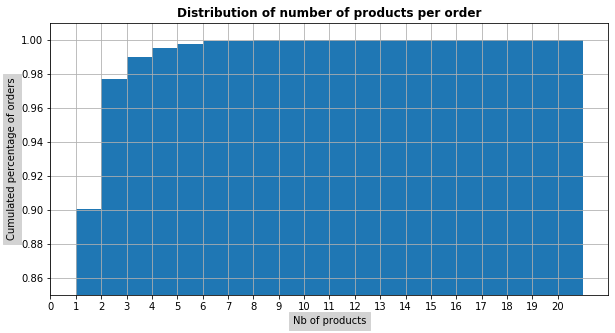

In [97]:
# Distribution of number of products per order
df_gr_ = df_items.groupby(by = 'order_id').agg({'product_id' : 'count'})

s_ = df_gr_['product_id']

plt.figure(figsize = (10,5))
plt.hist(s_, bins = s_.max()-1, 
         cumulative = True, density = True)

plt.xlabel('Nb of products', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulated percentage of orders', backgroundcolor = 'lightgrey')
plt.title('Distribution of number of products per order', fontweight = 'bold')

plt.ylim(0.85,1.01)
plt.gca().xaxis.set_ticks(range(s_.max()))
plt.grid(True)
plt.show()

In [98]:
s_.quantile(0.99), s_.quantile(0.995), s_.quantile(0.999)

(3.0, 4.0, 6.0)

In [99]:
# Mean number of products per order
df_gr_ = data.groupby(
    by = ['customer_unique_id', 'order_id'],
    as_index = False
).agg({'product_id' : 'count'})

df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').agg('mean')
df_gr_2.rename(
    columns = {'product_id' : 'mean_number_of_products_per_order'}, 
    inplace = True)

data_cust = data_cust.join(df_gr_2)

In [100]:
# Mean number of sellers per order
df_gr_ = data.groupby(
    by = ['customer_unique_id', 'order_id'],
    as_index = False
).agg({'seller_id' : 'nunique'})

df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').agg('mean')
df_gr_2.rename(
    columns = {'seller_id' : 'mean_number_of_sellers_per_order'},
    inplace = True
)

data_cust = data_cust.join(df_gr_2)

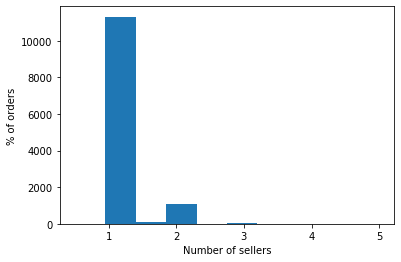

In [101]:
s_ = data_cust[data_cust['mean_number_of_products_per_order'] > 1]['mean_number_of_sellers_per_order']
plt.grid(True)
s_.plot.hist()

plt.xlabel('Number of sellers')
plt.ylabel('% of orders')
plt.show()

## Mean price and freight value

In [102]:
# Sum by customer id & order id
df_gr_ = data.groupby(
    by = ['customer_unique_id', 'order_id'], 
    as_index = False
).agg({'price' : 'sum',
       'freight_value' : 'sum',
       'payment_value' : 'sum'})
df_gr_['%_freight_value'] = df_gr_['freight_value'] / df_gr_['payment_value']

# Mean by customer id
df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').mean()
for c in df_gr_2.columns : 
    df_gr_2.rename(columns = {c : 'mean_'+c}, inplace = True)

In [103]:
data_cust = data_cust.join(df_gr_2)

In [104]:
# Number of price per quartile
df_gr_3 = df_gr_.iloc[:,:3]
df_gr_3['%_price<60'] = df_gr_3['price'] <= 60
df_gr_3['%_price<100'] = (df_gr_3['price'] > 60) & (df_gr_3['price'] <= 100)
df_gr_3['%_price<180'] = (df_gr_3['price'] > 100) & (df_gr_3['price'] <= 180)
df_gr_3['%_price>180'] = df_gr_3['price'] > 180

# Agregating by customer
df_gr_4 = df_gr_3.drop(columns = ['order_id', 'price']).groupby(by = 'customer_unique_id').sum()
df_gr_4['total'] = df_gr_4.sum(axis = 1)

# Conversion to percentage and joining in data_cust
for col in df_gr_4.columns[:-1]:
    df_gr_4[col] = df_gr_4[col]/df_gr_4['total']
    
data_cust = data_cust.join(df_gr_4)

## Percentage paid by payment type

In [105]:
df_gr_ = data.groupby(
    by = ['customer_unique_id','payment_type'], 
    as_index = False
).agg({'payment_value' : 'sum'})

df_pivot = df_gr_.pivot(
    index = 'customer_unique_id',
    columns = 'payment_type',
    values = 'payment_value'
).fillna(0)

df_pivot['sum'] = df_pivot.sum(axis = 1)
for c in df_pivot.columns:
    df_pivot['%_' + c] = df_pivot[c]/df_pivot['sum']
    
data_cust = data_cust.join(df_pivot.iloc[:,6:-1])

## Mean number of payment payment_installments

C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


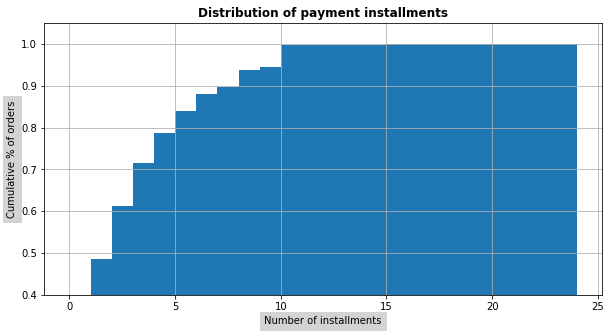

In [106]:
df_gr_ = data.groupby(
    by = ['customer_unique_id','order_id'], 
    as_index = False
).agg({'payment_installments' : 'max'})

df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').mean()

# Visualization
plt.figure(figsize = (10,5))
plt.hist(df_gr_2['payment_installments'],
         bins =24, cumulative = True,
        density = True)
plt.ylim(0.4,1.05)

plt.xlabel('Number of installments', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative % of orders', backgroundcolor = 'lightgrey')
plt.title('Distribution of payment installments', fontweight = 'bold')
plt.grid(True)
plt.show()

In [107]:
data_cust = data_cust.join(df_gr_2)

## Mean review and % of n-stared orders

### Overview

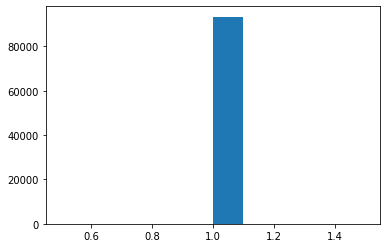

In [108]:
# Percentage of reviewed products
df_gr_ = data[data['order_status'] == 'delivered'].groupby(
    by = ['customer_unique_id']).agg({'order_id' : 'count', 'review_id' : 'count'})

df_gr_['%_reviewed_products'] = df_gr_['review_id']/df_gr_['order_id']

# Distribution
plt.figure()
plt.hist(df_gr_['%_reviewed_products'])
plt.show()

There is a review for every order.

### Mean review

In [109]:
df_gr_ = data.groupby(by = ['customer_unique_id', 'order_id']).agg(
    {'review_score' : 'mean', 'review_delay' : 'mean', 'review_has_title' : 'mean', 'review_has_message' : 'mean'}
)

df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').mean()
for col in df_gr_2.columns:
    df_gr_2.rename(columns = {col : 'mean_'+col}, inplace = True)

In [110]:
data_cust = data_cust.join(df_gr_2)

### Percentage of n-stared orders

In [111]:
df_gr_ = data.groupby(by = ['customer_unique_id', 'review_score'], as_index = False).agg({'order_id' : 'count'})
df_pivot = df_gr_.pivot(index = 'customer_unique_id', columns = 'review_score', values = 'order_id').fillna(0)

df_pivot['total'] = df_pivot.sum(axis = 1)
for i in range(1,6,1):
    df_pivot[i] = df_pivot[i]/df_pivot['total']
    df_pivot.rename(columns = {i : '%_{}-stared_review'.format(i)}, inplace = True)
df_pivot.iloc[:,:-1]

review_score                      %_1-stared_review  %_2-stared_review  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                0.0                0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                0.0                0.0   
0000f46a3911fa3c0805444483337064                0.0                0.0   
0000f6ccb0745a6a4b88665a16c9f078                0.0                0.0   
0004aac84e0df4da2b147fca70cf8255                0.0                0.0   
...                                             ...                ...   
fffcf5a5ff07b0908bd4e2dbc735a684                0.0                0.0   
fffea47cd6d3cc0a88bd621562a9d061                0.0                0.0   
ffff371b4d645b6ecea244b27531430a                0.0                0.0   
ffff5962728ec6157033ef9805bacc48                0.0                0.0   
ffffd2657e2aad2907e67c3e9daecbeb                0.0                0.0   

review_score                      %_3-stared_review  %_4-stared_review  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                0.0                0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                0.0                1.0   
0000f46a3911fa3c0805444483337064                1.0                0.0   
0000f6ccb0745a6a4b88665a16c9f078                0.0                1.0   
0004aac84e0df4da2b147fca70cf8255                0.0                0.0   
...                                             ...                ...   
fffcf5a5ff07b0908bd4e2dbc735a684                0.0                0.0   
fffea47cd6d3cc0a88bd621562a9d061                0.0                1.0   
ffff371b4d645b6ecea244b27531430a                0.0                0.0   
ffff5962728ec6157033ef9805bacc48                0.0                0.0   
ffffd2657e2aad2907e67c3e9daecbeb                0.0                0.0   

review_score                      %_5-stared_review  
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2                1.0  
0000b849f77a49e4a4ce2b2a4ca5be3f                0.0  
0000f46a3911fa3c0805444483337064                0.0  
0000f6ccb0745a6a4b88665a16c9f078                0.0  
0004aac84e0df4da2b147fca70cf8255                1.0  
...                                             ...  
fffcf5a5ff07b0908bd4e2dbc735a684                1.0  
fffea47cd6d3cc0a88bd621562a9d061                0.0  
ffff371b4d645b6ecea244b27531430a                1.0  
ffff5962728ec6157033ef9805bacc48                1.0  
ffffd2657e2aad2907e67c3e9daecbeb                1.0  

[96092 rows x 5 columns]

In [112]:
data_cust = data_cust.join(df_pivot.iloc[:,:-1])

## Distance between seller and customer

### Geolocation

In [113]:
data[['customer_lat', 'customer_lng', 'seller_lat','seller_lng']].dtypes

customer_lat    float64
customer_lng    float64
seller_lat      float64
seller_lng      float64
dtype: object

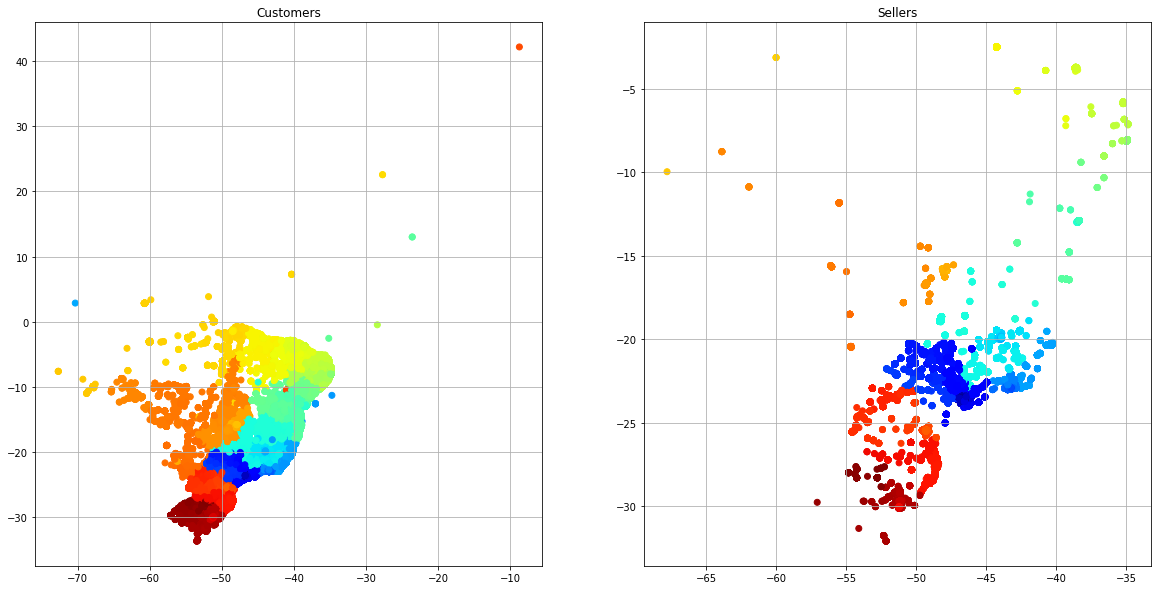

In [114]:
# Geolocation of customers and sellers
plt.figure(figsize = (20,10))

plt.subplot(121)
plt.scatter(data['customer_lng'], data['customer_lat'], 
            c = data['customer_zip_code_prefix'],
            cmap = 'jet')
plt.grid(True)
plt.title('Customers')

plt.subplot(122)
plt.scatter(data['seller_lng'], data['seller_lat'], 
            c = data['seller_zip_code_prefix'],
            cmap = 'jet')
plt.grid(True)
plt.title('Sellers')

plt.show()

In [115]:
data[data['customer_lat'] > 5][['customer_lat', 'customer_state', 'customer_city']]

customer_lat customer_state       customer_city
9116        7.271649             PA    vila dos cabanos
14619      42.184003             PR  ilha dos valadares
67955      13.001420             BA            ibiajara
67956      13.001420             BA            ibiajara
76840       7.271649             PA    vila dos cabanos
79899      22.567952             PA     porto trombetas
79920      22.567952             PA     porto trombetas
114420      7.271649             PA    vila dos cabanos
117719      7.271649             PA    vila dos cabanos

### Calculate distance

In [116]:
# Calculate distance between sellers and customer using haversine formula
from haversine import haversine
data['cust_coord'] = list(zip(data['customer_lat'], data['customer_lng']))
data['sell_coord'] = list(zip(data['seller_lat'], data['seller_lng']))
data['cust_to_sell_distance'] = data.apply(lambda row : haversine(row['cust_coord'], row['sell_coord']), axis = 1)

C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alexa_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


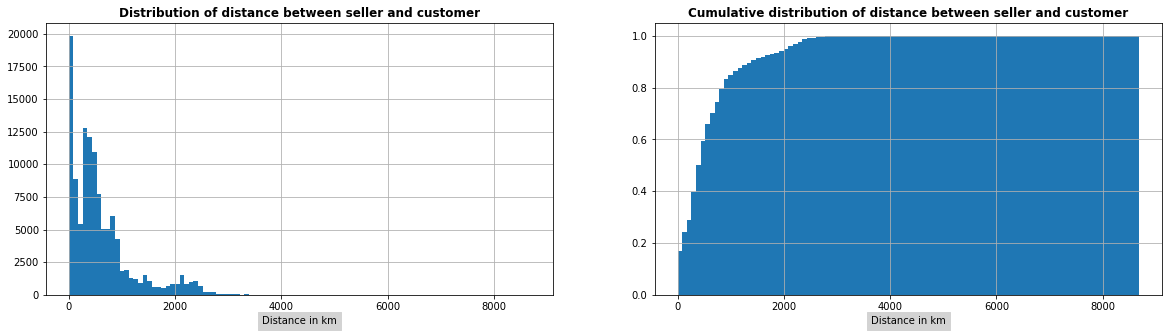

In [117]:
# Distribution of seller-customer distance
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.hist(data['cust_to_sell_distance'], bins = 100)
plt.title('Distribution of distance between seller and customer', fontweight = 'bold')
plt.xlabel('Distance in km', backgroundcolor = 'lightgrey')
plt.grid(True)

plt.subplot(122)
plt.hist(data['cust_to_sell_distance'], bins = 100, cumulative = True, density = True)
plt.title('Cumulative distribution of distance between seller and customer', fontweight = 'bold')
plt.xlabel('Distance in km', backgroundcolor = 'lightgrey')
plt.grid(True)

plt.show()

In [118]:
data['cust_to_sell_distance'].describe()

count    117705.000000
mean        597.306165
std         589.326878
min           0.000000
25%         187.622283
50%         431.951055
75%         792.435827
max        8677.923608
Name: cust_to_sell_distance, dtype: float64

In [119]:
len(data[data['cust_to_sell_distance']<200])/data.shape[0], len(data[data['cust_to_sell_distance']<450])/data.shape[0], len(data[data['cust_to_sell_distance']<800])/data.shape[0]

(0.25277243764638724, 0.5101621068007622, 0.7444320385496856)

### Aggregations

In [120]:
# Aggreagting mean distance
df_gr_ = data.groupby(by = ['customer_unique_id', 'product_id'], as_index = False).agg({'cust_to_sell_distance' : 'mean'})
df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').mean()
df_gr_2.rename(columns = {'cust_to_sell_distance' : 'mean_cust_sell_distance'}, inplace = True)
data_cust = data_cust.join(df_gr_2)

In [121]:
# Number of seller-customer distance per quartiles
df_gr_['%_dist_<200'] = df_gr_['cust_to_sell_distance'] <= 200
df_gr_['%_dist_<500'] = (df_gr_['cust_to_sell_distance'] <= 500) & (df_gr_['cust_to_sell_distance'] > 200)
df_gr_['%_dist_<800'] = (df_gr_['cust_to_sell_distance'] <= 800) & (df_gr_['cust_to_sell_distance'] > 500)
df_gr_['%_dist_>800'] = df_gr_['cust_to_sell_distance'] > 800

# Aggregation per customer_unique_id
df_gr_3 = df_gr_.groupby(by = 'customer_unique_id').sum().iloc[:,1:]
df_gr_3['total'] = df_gr_3.sum(axis = 1)

# Conversion to percentage
for col in df_gr_3.columns[:-1]:
    df_gr_3[col] = df_gr_3[col]/df_gr_3['total']

# Join to data_cust
data_cust = data_cust.join(df_gr_3.iloc[:,:-1])

## Percentage of ordered products per category

In [122]:
# Number of categories
df_categories.shape

(73, 2)

In [123]:
# Grouping by category
df_gr_ = data.groupby(by = ['customer_unique_id','product_category_name_english'], as_index = False).agg({'product_id' : 'count'})
df_pivot = df_gr_.pivot(index = 'customer_unique_id', columns = 'product_category_name_english', values = 'product_id').fillna(0)

# Categories without order
s_ = df_pivot.sum()
s_[s_ == 0]

Series([], dtype: float64)

In [124]:
# Percentage of product ordered by category
for col in df_pivot.columns:
    df_pivot[col] = df_pivot[col]/df_pivot.sum(axis = 1) 
    df_pivot.rename(columns = {col : '%_categ_'+col}, inplace = True)

In [125]:
data_cust = data_cust.join(df_pivot)

## Mean time between 2 orders

In [126]:
# customers with more than 1 order id
list_cust_2 = data_cust[data_cust['nb_of_orders']>1].index.tolist()

df_gr_ = data[data['customer_unique_id'].isin(list_cust_2)].groupby(
    by = ['customer_unique_id', 'order_id','order_purchase_timestamp'],
    as_index = False
).agg({'product_id' : 'count'})

df_gr_.sort_values(by = ['customer_unique_id','order_purchase_timestamp'], inplace = True)

# Calculate time delta if 2 consecutives rows relate to the same customer
df_gr_['previous_cust'] = pd.Series(np.nan).append(df_gr_['customer_unique_id'].iloc[:-1]).values
df_gr_['purchase_delta'] = df_gr_['order_purchase_timestamp'].diff().astype('timedelta64[D]')
df_gr_['purchase_delta'] = df_gr_['purchase_delta'].mask(df_gr_['previous_cust'] != df_gr_['customer_unique_id'])

df_gr_

customer_unique_id                          order_id  \
0     00172711b30d52eea8b313a7f2cced02  bb874c45df1a3c97842d52f31efee99a   
1     00172711b30d52eea8b313a7f2cced02  c306eca42d32507b970739b5b6a5a33a   
3     004288347e5e88a27ded2bb23747066c  a61d617fbe5bd006e40d3a0988fc844b   
2     004288347e5e88a27ded2bb23747066c  08204559bebd39e09ee52dcb56d8faa2   
4     004b45ec5c64187465168251cd1c9c2f  90ae229a4addcfead792e2564554f09c   
...                                ...                               ...   
6321  ff922bdd6bafcdf99cb90d7f39cea5b3  fd216c435fda2be27c92920a5e5dba82   
6319  ff922bdd6bafcdf99cb90d7f39cea5b3  5f79e2da24a52e76bc22897df03a7901   
6320  ff922bdd6bafcdf99cb90d7f39cea5b3  6be1646fccbb69d34b22da3b1807d51d   
6322  ffe254cc039740e17dd15a5305035928  39a0e2f723def2e12a51e963006c9242   
6323  ffe254cc039740e17dd15a5305035928  ebe76afae9242fc70b0b807b78f17adb   

     order_purchase_timestamp  product_id                     previous_cust  \
0         2018-07-28 00:23:49           1                               NaN   
1         2018-08-13 09:14:07           0  00172711b30d52eea8b313a7f2cced02   
3         2017-07-27 14:13:03           1  00172711b30d52eea8b313a7f2cced02   
2         2018-01-14 07:36:54           1  004288347e5e88a27ded2bb23747066c   
4         2017-09-01 12:11:23           1  004288347e5e88a27ded2bb23747066c   
...                       ...         ...                               ...   
6321      2017-02-22 12:26:42           1  ff8892f7c26aa0446da53d01b18df463   
6319      2017-08-23 13:15:29           1  ff922bdd6bafcdf99cb90d7f39cea5b3   
6320      2017-09-14 14:24:04           1  ff922bdd6bafcdf99cb90d7f39cea5b3   
6322      2017-04-02 16:33:30           1  ff922bdd6bafcdf99cb90d7f39cea5b3   
6323      2017-04-02 16:33:30           1  ffe254cc039740e17dd15a5305035928   

      purchase_delta  
0                NaN  
1               16.0  
3                NaN  
2              170.0  
4                NaN  
...              ...  
6321             NaN  
6319           182.0  
6320            22.0  
6322             NaN  
6323             0.0  

[6324 rows x 6 columns]

In [127]:
# Aggregation by customer & join to data_cust
df_gr_2 = df_gr_.groupby(by = 'customer_unique_id').agg({'purchase_delta' : 'mean'})
df_gr_2.rename(columns = {'purchase_delta' : 'mean_purchase_delta'}, inplace = True)
data_cust = data_cust.join(df_gr_2)

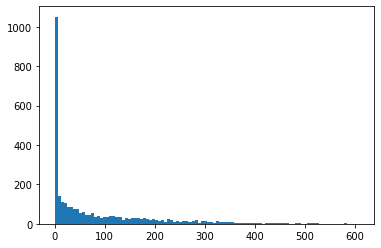

In [128]:
# Distibution
plt.hist(df_gr_2['mean_purchase_delta'], bins = 100)
plt.show()

# Cleaning

In [129]:
# Shape of the dataset
data_cust.shape

(96092, 134)

## Filling NaN values

In [130]:
# Series with NaN values
s_ = data_cust.count()/data_cust.shape[0]
s_[s_ < 1][:50]

customer_lat                               0.997211
customer_lng                               0.997211
mean_delivery_time                         0.971486
mean_delivery_delay                        0.971486
mean_%_freight_value                       0.999979
%_boleto                                   0.999969
%_credit_card                              0.999969
%_debit_card                               0.999969
%_not_defined                              0.999969
%_voucher                                  0.999969
payment_installments                       0.999990
mean_cust_sell_distance                    0.988116
%_dist_<200                                0.988116
%_dist_<500                                0.988116
%_dist_<800                                0.988116
%_dist_>800                                0.988116
%_categ_agro_industry_and_commerce         0.979311
%_categ_air_conditioning                   0.979311
%_categ_art                                0.979311
%_categ_arts

In [131]:
# Filling Nan for %_ columns
l_pct = [x for x in data_cust.columns if x[:2] == '%_']
data_cust[l_pct].fillna(0, inplace = True)

# Remaining uncompleted columns
s_ = data_cust.count()/data_cust.shape[0]
s_[s_ < 1]

C:\Users\alexa_000\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


customer_lat                      0.997211
customer_lng                      0.997211
mean_delivery_time                0.971486
mean_delivery_delay               0.971486
mean_%_freight_value              0.999979
                                    ...   
%_categ_tablets_printing_image    0.979311
%_categ_telephony                 0.979311
%_categ_toys                      0.979311
%_categ_watches_gifts             0.979311
mean_purchase_delta               0.031147
Length: 90, dtype: float64

In [132]:
# Filling mean_purcharse_delta
data_cust['mean_purchase_delta'].fillna(0, inplace = True)

In [133]:
# Filling remaining columns with mean of the column
for col in s_[s_ < 1].index:
    c_mean = data_cust[col].mean()
    data_cust[col].fillna(c_mean, inplace = True)

## Transforming categorical values

In [134]:
# Remaining categorical values
l_categ = [x for x in data_cust.columns if data_cust[x].dtype == 'object']
l_categ

['customer_city', 'customer_state']

In [135]:
# Number of states and cities
len(data_cust['customer_state'].unique()), len(data_cust['customer_city'].unique())

(27, 4119)

In [136]:
# Dropping city column and encoding customer_state
df_states = pd.get_dummies(data_cust['customer_state'])
df_states.columns = ['is_customer_state_' + x for x in df_states.columns]

data_cust = data_cust.join(df_states)
data_cust.drop(columns = ['customer_city'], inplace = True)

## Infinite values

In [137]:
# Max values
data_cust.drop(columns = ['customer_state', 'order_purchase_timestamp']).max().sort_values(ascending = False).head(10)

mean_%_freight_value                inf
mean_payment_value         1.093126e+05
mean_price                 1.344000e+04
mean_cust_sell_distance    8.677924e+03
mean_freight_value         1.897760e+03
mean_purchase_delta        6.080000e+02
mean_review_delay          5.180000e+02
mean_delivery_time         2.090000e+02
mean_delivery_delay        1.880000e+02
mean_estimated_time        1.550000e+02
dtype: float64

In [138]:
# Min values
data_cust.drop(columns = ['customer_state', 'order_purchase_timestamp']).min().sort_values(ascending = True).head(10)

mean_delivery_delay                      -147.000000
customer_lng                              -72.668881
customer_lat                              -33.689948
%_categ_costruction_tools_garden            0.000000
%_categ_home_appliances_2                   0.000000
%_categ_home_comfort_2                      0.000000
%_categ_home_confort                        0.000000
%_categ_home_construction                   0.000000
%_categ_housewares                          0.000000
%_categ_industry_commerce_and_business      0.000000
dtype: float64

In [139]:
# Infinite value on % freight value
data_cust[data_cust['mean_%_freight_value'] == data_cust['mean_%_freight_value'].max()][
    ['%_delivered', 'mean_price', 'mean_freight_value', 'mean_payment_value', 'mean_%_freight_value']
]

%_delivered  mean_price  mean_freight_value  \
customer_unique_id                                                              
4fa4365000c7090fcb8cad5713c6d3db          0.0        0.00                0.00   
830d5b7aaa3b6f1e9ad63703bec97d23          1.0      134.97                8.49   
968fac81e2c44fb6c1e3ac2a45e6a102          0.0        0.00                0.00   

                                  mean_payment_value  mean_%_freight_value  
customer_unique_id                                                          
4fa4365000c7090fcb8cad5713c6d3db                 0.0                   inf  
830d5b7aaa3b6f1e9ad63703bec97d23                 0.0                   inf  
968fac81e2c44fb6c1e3ac2a45e6a102                 0.0                   inf

In [140]:
data[data['customer_unique_id'] == '830d5b7aaa3b6f1e9ad63703bec97d23'][['price', 'freight_value', 'payment_value']]

price  freight_value  payment_value
84069  44.99           2.83            NaN
84070  44.99           2.83            NaN
84071  44.99           2.83            NaN

In [141]:
# Dropping
drop_list = data_cust[data_cust['mean_%_freight_value'] == data_cust['mean_%_freight_value'].max()].index
data_cust.drop(index = drop_list, inplace = True)

In [142]:
data_cust.shape

(96089, 160)

In [143]:
data_cust

nb_of_orders customer_state  customer_lat  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2             1             SP    -23.340235   
0000b849f77a49e4a4ce2b2a4ca5be3f             1             SP    -23.559115   
0000f46a3911fa3c0805444483337064             1             SC    -27.542880   
0000f6ccb0745a6a4b88665a16c9f078             1             PA     -1.312214   
0004aac84e0df4da2b147fca70cf8255             1             SP    -23.505548   
...                                        ...            ...           ...   
fffcf5a5ff07b0908bd4e2dbc735a684             1             PE     -8.362511   
fffea47cd6d3cc0a88bd621562a9d061             1             BA    -12.217395   
ffff371b4d645b6ecea244b27531430a             1             MT    -11.834552   
ffff5962728ec6157033ef9805bacc48             1             ES    -21.126568   
ffffd2657e2aad2907e67c3e9daecbeb             1             PR    -25.447504   

                                  customer_lng order_purchase_timestamp  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2    -46.830140      2018-05-10 10:56:27   
0000b849f77a49e4a4ce2b2a4ca5be3f    -46.787626      2018-05-07 11:11:27   
0000f46a3911fa3c0805444483337064    -48.633426      2017-03-10 21:05:03   
0000f6ccb0745a6a4b88665a16c9f078    -48.483159      2017-10-12 20:29:41   
0004aac84e0df4da2b147fca70cf8255    -47.469705      2017-11-14 19:45:42   
...                                        ...                      ...   
fffcf5a5ff07b0908bd4e2dbc735a684    -36.562343      2017-06-08 21:00:36   
fffea47cd6d3cc0a88bd621562a9d061    -38.959308      2017-12-10 20:07:56   
ffff371b4d645b6ecea244b27531430a    -55.508110      2017-02-07 15:49:16   
ffff5962728ec6157033ef9805bacc48    -41.672806      2018-05-02 15:17:41   
ffffd2657e2aad2907e67c3e9daecbeb    -49.441283      2017-05-02 20:18:45   

                                  %_approved  %_canceled  %_created  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2         0.0         0.0        0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f         0.0         0.0        0.0   
0000f46a3911fa3c0805444483337064         0.0         0.0        0.0   
0000f6ccb0745a6a4b88665a16c9f078         0.0         0.0        0.0   
0004aac84e0df4da2b147fca70cf8255         0.0         0.0        0.0   
...                                      ...         ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684         0.0         0.0        0.0   
fffea47cd6d3cc0a88bd621562a9d061         0.0         0.0        0.0   
ffff371b4d645b6ecea244b27531430a         0.0         0.0        0.0   
ffff5962728ec6157033ef9805bacc48         0.0         0.0        0.0   
ffffd2657e2aad2907e67c3e9daecbeb         0.0         0.0        0.0   

                                  %_delivered  %_invoiced  %_processing  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2          1.0         0.0           0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0         0.0           0.0   
0000f46a3911fa3c0805444483337064          1.0         0.0           0.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0         0.0           0.0   
0004aac84e0df4da2b147fca70cf8255          1.0         0.0           0.0   
...                                       ...         ...           ...   
fffcf5a5ff07b0908bd4e2dbc735a684          1.0         0.0           0.0   
fffea47cd6d3cc0a88bd621562a9d061          1.0         0.0           0.0   
ffff371b4d645b6ecea244b27531430a          1.0         0.0           0.0   
ffff5962728ec6157033ef9805bacc48          1.0         0.0           0.0   
ffffd2657e2aad2907e67c3e9daecbeb          1.0         0.0           0.0   

                                  %_shipped  %_unavailable  \
customer_unique_id                                           
000036

## Dimensionality Reduction

### Grouping states per brazilian regions

In [144]:
# Dataset containing information on brazilian states
df_brasil = pd.read_csv("Data\Brasil_states.txt")

In [145]:
# State-Region correspondance
df_brasil[['UF','Region']]

UF       Region
0   AC        North
1   AL    Northeast
2   AM        North
3   AP        North
4   BA    Northeast
5   CE    Northeast
6   DF  Center-west
7   ES    Southeast
8   GO  Center-west
9   MA    Northeast
10  MG    Southeast
11  MS  Center-west
12  MT  Center-west
13  PA        North
14  PB    Northeast
15  PE    Northeast
16  PI    Northeast
17  PR        South
18  RJ    Southeast
19  RN    Northeast
20  RO        North
21  RR        North
22  RS        South
23  SC        South
24  SE    Northeast
25  SP    Southeast
26  TO        North

In [146]:
# Checking integrity of state list
[x for x in df_brasil['UF'].tolist() if x not in data['customer_state'].unique().tolist()]

[]

In [147]:
df_brasil.index = df_brasil['UF'].values
df_brasil = df_brasil[['Region']]

In [148]:
# Adding Region in data_cust
data_cust['Region'] = data_cust['customer_state'].apply(lambda x: df_brasil['Region'][x])
data_cust[data_cust['Region'].isna()]

Empty DataFrame
Columns: [nb_of_orders, customer_state, customer_lat, customer_lng, order_purchase_timestamp, %_approved, %_canceled, %_created, %_delivered, %_invoiced, %_processing, %_shipped, %_unavailable, mean_delivery_time, mean_estimated_time, mean_delivery_delay, %_Q1delivery_time_quantile, %_Q2delivery_time_quantile, %_Q3delivery_time_quantile, %_Q4delivery_time_quantile, %_Q1estimated_time_quantile, %_Q2estimated_time_quantile, %_Q3estimated_time_quantile, %_Q4estimated_time_quantile, %_Q1delivery_delay_quantile, %_Q2delivery_delay_quantile, %_Q3delivery_delay_quantile, %_Q4delivery_delay_quantile, mean_number_of_products_per_order, mean_number_of_sellers_per_order, mean_price, mean_freight_value, mean_payment_value, mean_%_freight_value, %_price<60, %_price<100, %_price<180, %_price>180, total, %_boleto, %_credit_card, %_debit_card, %_not_defined, %_voucher, payment_installments, mean_review_score, mean_review_delay, mean_review_has_title, mean_review_has_message, %_1-stared_review, %_2-stared_review, %_3-stared_review, %_4-stared_review, %_5-stared_review, mean_cust_sell_distance, %_dist_<200, %_dist_<500, %_dist_<800, %_dist_>800, %_categ_agro_industry_and_commerce, %_categ_air_conditioning, %_categ_art, %_categ_arts_and_craftmanship, %_categ_audio, %_categ_auto, %_categ_baby, %_categ_bed_bath_table, %_categ_books_general_interest, %_categ_books_imported, %_categ_books_technical, %_categ_cds_dvds_musicals, %_categ_christmas_supplies, %_categ_cine_photo, %_categ_computers, %_categ_computers_accessories, %_categ_consoles_games, %_categ_construction_tools_construction, %_categ_construction_tools_lights, %_categ_construction_tools_safety, %_categ_cool_stuff, %_categ_costruction_tools_garden, %_categ_costruction_tools_tools, %_categ_diapers_and_hygiene, %_categ_drinks, %_categ_dvds_blu_ray, %_categ_electronics, %_categ_fashio_female_clothing, %_categ_fashion_bags_accessories, %_categ_fashion_childrens_clothes, %_categ_fashion_male_clothing, %_categ_fashion_shoes, %_categ_fashion_sport, %_categ_fashion_underwear_beach, %_categ_fixed_telephony, %_categ_flowers, %_categ_food, %_categ_food_drink, %_categ_furniture_bedroom, %_categ_furniture_decor, %_categ_furniture_living_room, ...]
Index: []

[0 rows x 161 columns]

In [149]:
# Encoding Regions
df_regions = pd.get_dummies(data_cust['Region'])
df_regions.columns = ['is_Region_' + x for x in df_regions.columns]

data_cust = data_cust.join(df_regions)

In [150]:
# Deleting encoded state data
data_cust.drop(columns = df_states.columns, inplace = True)
data_cust.drop(columns = ['customer_state', 'Region'], inplace = True)
data_cust.shape

(96089, 137)

### PCA

In [151]:
# Standardisation des variables
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(data_cust.drop(columns = 'order_purchase_timestamp'))
X_scaled = std_scale.transform(data_cust.drop(columns = 'order_purchase_timestamp'))

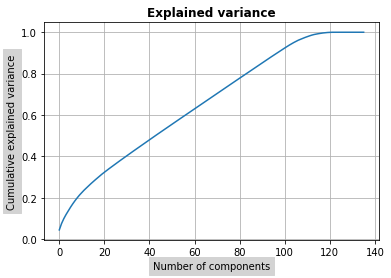

In [152]:
# Décomposition en composantes principales
from sklearn import decomposition
pca = decomposition.PCA(n_components = data_cust.shape[1]-1)
pca.fit(X_scaled)

# Explained variance
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.title('Explained variance', fontweight = 'bold')
plt.xlabel('Number of components', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative explained variance', backgroundcolor = 'lightgrey')

plt.grid(True)
plt.show()

In [153]:
pca.explained_variance_ratio_[-30:]

array([5.32288179e-03, 4.49121442e-03, 4.44786273e-03, 4.37031879e-03,
       4.02711212e-03, 3.75738322e-03, 3.53898504e-03, 2.90074249e-03,
       2.21661793e-03, 1.99501630e-03, 1.83168919e-03, 1.54317833e-03,
       1.21251036e-03, 9.95314780e-04, 6.87487882e-04, 4.35798499e-04,
       8.68067059e-05, 4.76494661e-06, 1.66810768e-06, 3.81125423e-30,
       1.37833073e-32, 5.88137565e-33, 3.85208513e-33, 3.64944873e-33,
       2.10419095e-33, 1.96494088e-33, 1.80615311e-33, 1.67936537e-33,
       1.52899964e-33, 1.30272341e-35])

### Quick clustering of products for reducing number of categories

In [154]:
# Number of categories
len(df_categories)

73

#### Clustering dataframe

In [155]:
# Creating a dedicated dataframe for product quick clustering
df_prod_clust = df_items[['product_id', 'seller_id', 'price']].copy()

# Product information
df_prod_clust = df_prod_clust.merge(
    df_products[['product_id', 'product_weight_g', 'product_length_cm', 
                 'product_height_cm', 'product_width_cm','product_volume_cm3', 
                 'product_category_name']],
    on = ['product_id'], how = 'left'
)

# English category names
df_prod_clust = df_prod_clust.merge(
    df_categories,
    on = ['product_category_name'], how = 'left'
).drop(columns = ['product_category_name'])

In [156]:
len(df_prod_clust['seller_id'].unique())

3095

In [157]:
# Categories encoding
df_dummy_categ = pd.get_dummies(df_prod_clust['product_category_name_english'])
df_prod_clust = df_prod_clust.join(df_dummy_categ)

In [158]:
df_prod_clust = df_prod_clust[~df_prod_clust['product_weight_g'].isna()]

#### Searching optimal number of clusters

In [159]:
# Scaling
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
prd_scaled = std_scale.fit_transform(df_prod_clust.drop(columns = ['product_id', 'seller_id', 'product_category_name_english']))

In [160]:
from sklearn.cluster import KMeans

# Training with K-means for 2 to 10 clusters
inertias = []


for n_clts in range(2,11,1):
    # Training
    kmeans = KMeans(n_clusters = n_clts)
    kmeans.fit(prd_scaled)
    
    # Scores
    inertias.append(kmeans.inertia_)

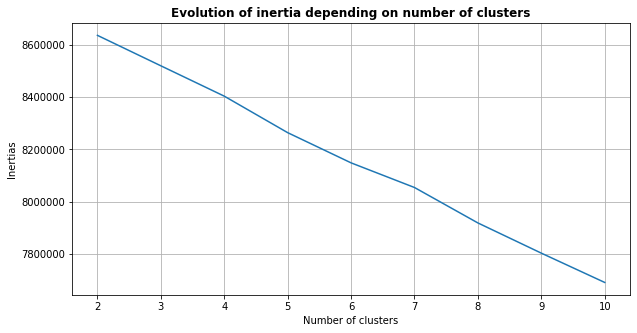

In [161]:
# Visualisation of inertia depending on the number of clusters
plt.figure(figsize = (10,5))
plt.plot(np.arange(2,11,1), inertias)

plt.title('Evolution of inertia depending on number of clusters',fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.grid(True)

plt.show()

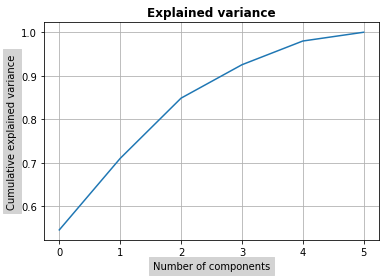

In [162]:
X_ = df_prod_clust[['price', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3']]

X_sc = std_scale.fit_transform(X_)

pca = decomposition.PCA(n_components = X_sc.shape[1])
pca.fit(X_sc)

# Explained variance
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.title('Explained variance', fontweight = 'bold')
plt.xlabel('Number of components', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative explained variance', backgroundcolor = 'lightgrey')

plt.grid(True)
plt.show()

#### Visualisation

In [163]:
X_proj = pca.transform(X_sc)

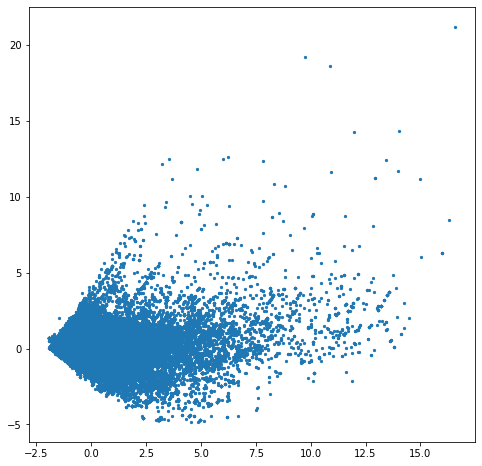

In [164]:
plt.figure(figsize = (8,8))
plt.scatter(X_proj[:,0], X_proj[:,1], s = 5)
plt.show()

In [165]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 2)
fa.fit(X_sc)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [166]:
X_proj_fa = fa.transform(X_sc)

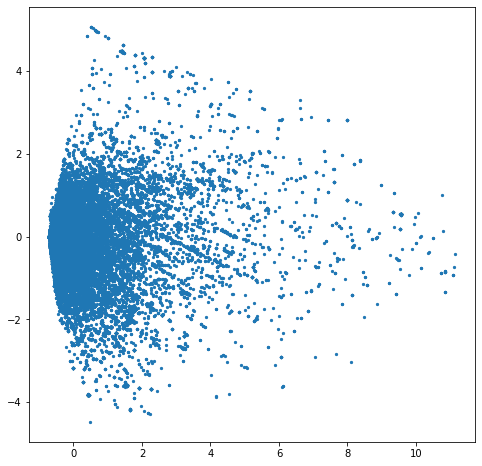

In [167]:
plt.figure(figsize = (8,8))
plt.scatter(X_proj_fa[:,0], X_proj_fa[:,1],s = 5)
plt.show()

### Manually grouping product categories

In [168]:
# category related columns
c_categ = [col for col in data_cust.columns if str(col)[:8] == '%_categ_']
len(c_categ)

73

In [169]:
# Deleting columns related to categories
data_cust = data_cust.drop(columns = c_categ)

In [170]:
df_groups = pd.read_csv("Data\product_category_name_translation_and_group.csv", sep = ';')
df_groups.head()

product_category_name product_category_name_english    group
0            beleza_saude                 health_beauty  clothes
1  informatica_acessorios         computers_accessories     tech
2              automotivo                          auto     auto
3         cama_mesa_banho                bed_bath_table     home
4        moveis_decoracao               furniture_decor     home

In [171]:
# Merging categories group
data = data.merge(df_groups.iloc[:,1:],
                 on = 'product_category_name_english',
                 how = 'left')

In [172]:
# Grouping by category group
df_gr_ = data.groupby(by = ['customer_unique_id','group'], as_index = False).agg({'product_id' : 'count'})
df_pivot = df_gr_.pivot(index = 'customer_unique_id', columns = 'group', values = 'product_id').fillna(0)

# Groups without order
s_ = df_pivot.sum()
s_[s_ == 0]

Series([], dtype: float64)

In [173]:
df_pivot

group                             auto  business  clothes  construction  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2   0.0       0.0      0.0           0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f   0.0       0.0      1.0           0.0   
0000f46a3911fa3c0805444483337064   0.0       1.0      0.0           0.0   
0000f6ccb0745a6a4b88665a16c9f078   0.0       0.0      0.0           0.0   
0004aac84e0df4da2b147fca70cf8255   0.0       0.0      0.0           0.0   
...                                ...       ...      ...           ...   
fffcf5a5ff07b0908bd4e2dbc735a684   0.0       0.0      2.0           0.0   
fffea47cd6d3cc0a88bd621562a9d061   0.0       0.0      0.0           0.0   
ffff371b4d645b6ecea244b27531430a   1.0       0.0      0.0           0.0   
ffff5962728ec6157033ef9805bacc48   0.0       0.0      1.0           0.0   
ffffd2657e2aad2907e67c3e9daecbeb   0.0       0.0      1.0           0.0   

group                             consumables  home  leisure  tech  
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2          0.0   1.0      0.0   0.0  
0000b849f77a49e4a4ce2b2a4ca5be3f          0.0   0.0      0.0   0.0  
0000f46a3911fa3c0805444483337064          0.0   0.0      0.0   0.0  
0000f6ccb0745a6a4b88665a16c9f078          0.0   0.0      0.0   1.0  
0004aac84e0df4da2b147fca70cf8255          0.0   0.0      0.0   1.0  
...                                       ...   ...      ...   ...  
fffcf5a5ff07b0908bd4e2dbc735a684          0.0   0.0      0.0   0.0  
fffea47cd6d3cc0a88bd621562a9d061          0.0   1.0      0.0   0.0  
ffff371b4d645b6ecea244b27531430a          0.0   0.0      0.0   0.0  
ffff5962728ec6157033ef9805bacc48          0.0   0.0      0.0   0.0  
ffffd2657e2aad2907e67c3e9daecbeb          0.0   0.0      0.0   0.0  

[94084 rows x 8 columns]

In [174]:
# Percentage of product ordered by category group
for col in df_pivot.columns:
    df_pivot[col] = df_pivot[col]/df_pivot.sum(axis = 1) 
    df_pivot.rename(columns = {col : '%_categ_group_'+col}, inplace = True)

In [175]:
data_cust = data_cust.join(df_pivot)

In [176]:
data_cust.shape

(96089, 72)

In [177]:
# Filling group for unknown product categories
col_group = [col for col in data_cust.columns if col[:13] == '%_categ_group']
data_cust[col_group] = data_cust[col_group].fillna(0)

In [178]:
# Last check
for c in data_cust.columns:
    n_na = len(data_cust[data_cust[c].isna()])
    print("{} : {}".format(c, n_na))

nb_of_orders : 0
customer_lat : 0
customer_lng : 0
order_purchase_timestamp : 0
%_approved : 0
%_canceled : 0
%_created : 0
%_delivered : 0
%_invoiced : 0
%_processing : 0
%_shipped : 0
%_unavailable : 0
mean_delivery_time : 0
mean_estimated_time : 0
mean_delivery_delay : 0
%_Q1delivery_time_quantile : 0
%_Q2delivery_time_quantile : 0
%_Q3delivery_time_quantile : 0
%_Q4delivery_time_quantile : 0
%_Q1estimated_time_quantile : 0
%_Q2estimated_time_quantile : 0
%_Q3estimated_time_quantile : 0
%_Q4estimated_time_quantile : 0
%_Q1delivery_delay_quantile : 0
%_Q2delivery_delay_quantile : 0
%_Q3delivery_delay_quantile : 0
%_Q4delivery_delay_quantile : 0
mean_number_of_products_per_order : 0
mean_number_of_sellers_per_order : 0
mean_price : 0
mean_freight_value : 0
mean_payment_value : 0
mean_%_freight_value : 0
%_price<60 : 0
%_price<100 : 0
%_price<180 : 0
%_price>180 : 0
total : 0
%_boleto : 0
%_credit_card : 0
%_debit_card : 0
%_not_defined : 0
%_voucher : 0
payment_installments : 0
mean_r

### Correlation matrix

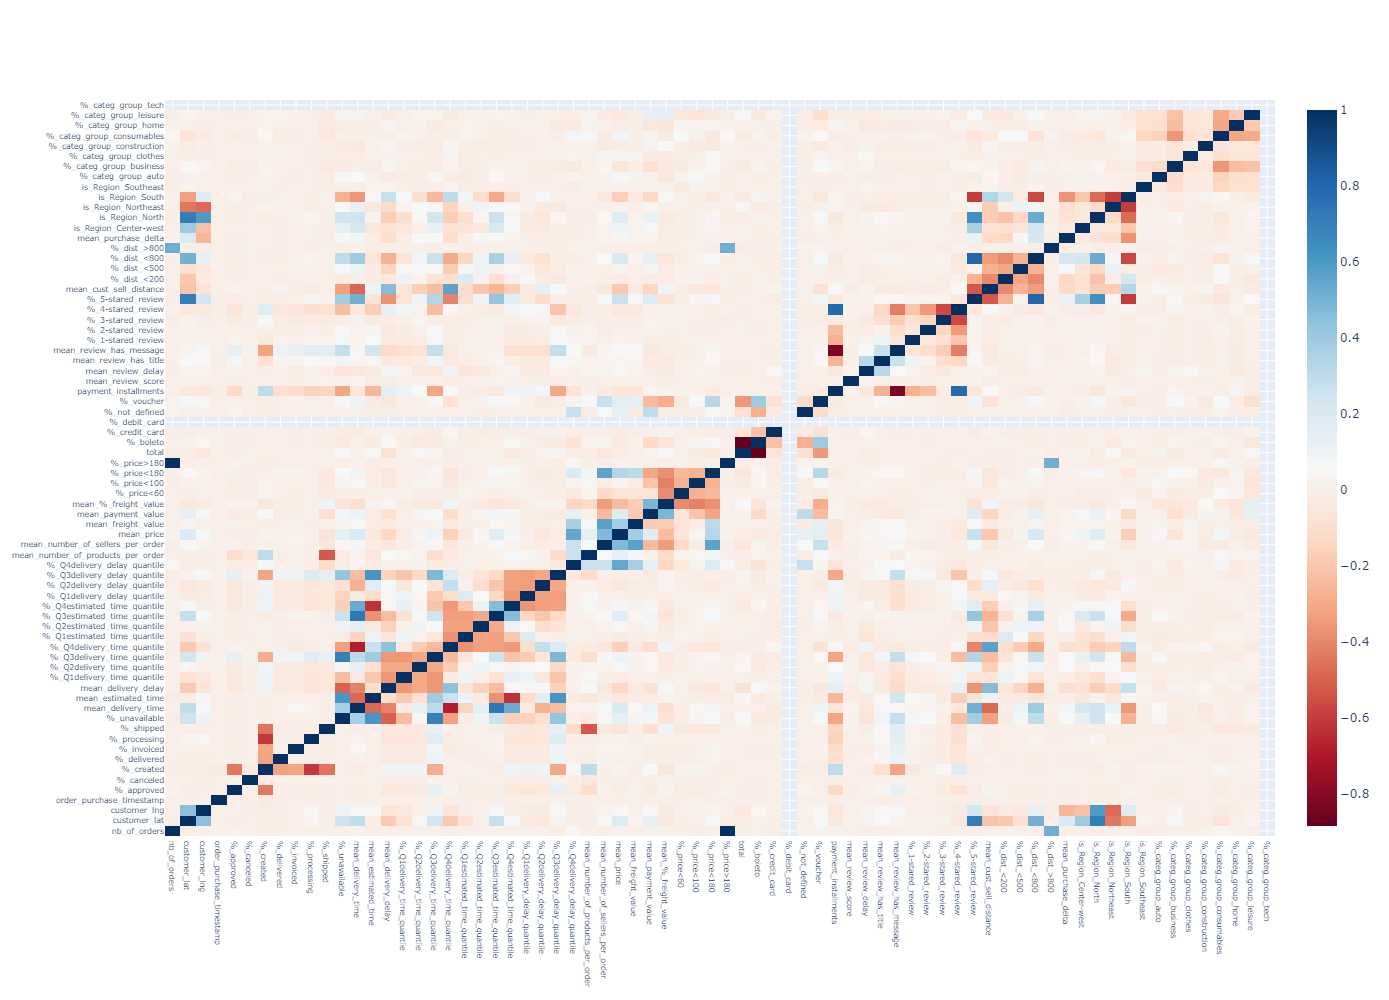

In [182]:
# Correlations
df_corr = data_cust.corr()

import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
    z = df_corr, x = data_cust.columns, y = data_cust.columns, colorscale = 'rdbu'
))

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
)
fig.update_xaxes(tickfont = dict(size = 7.5))
fig.update_yaxes(tickfont = dict(size = 7.8))
fig.show()

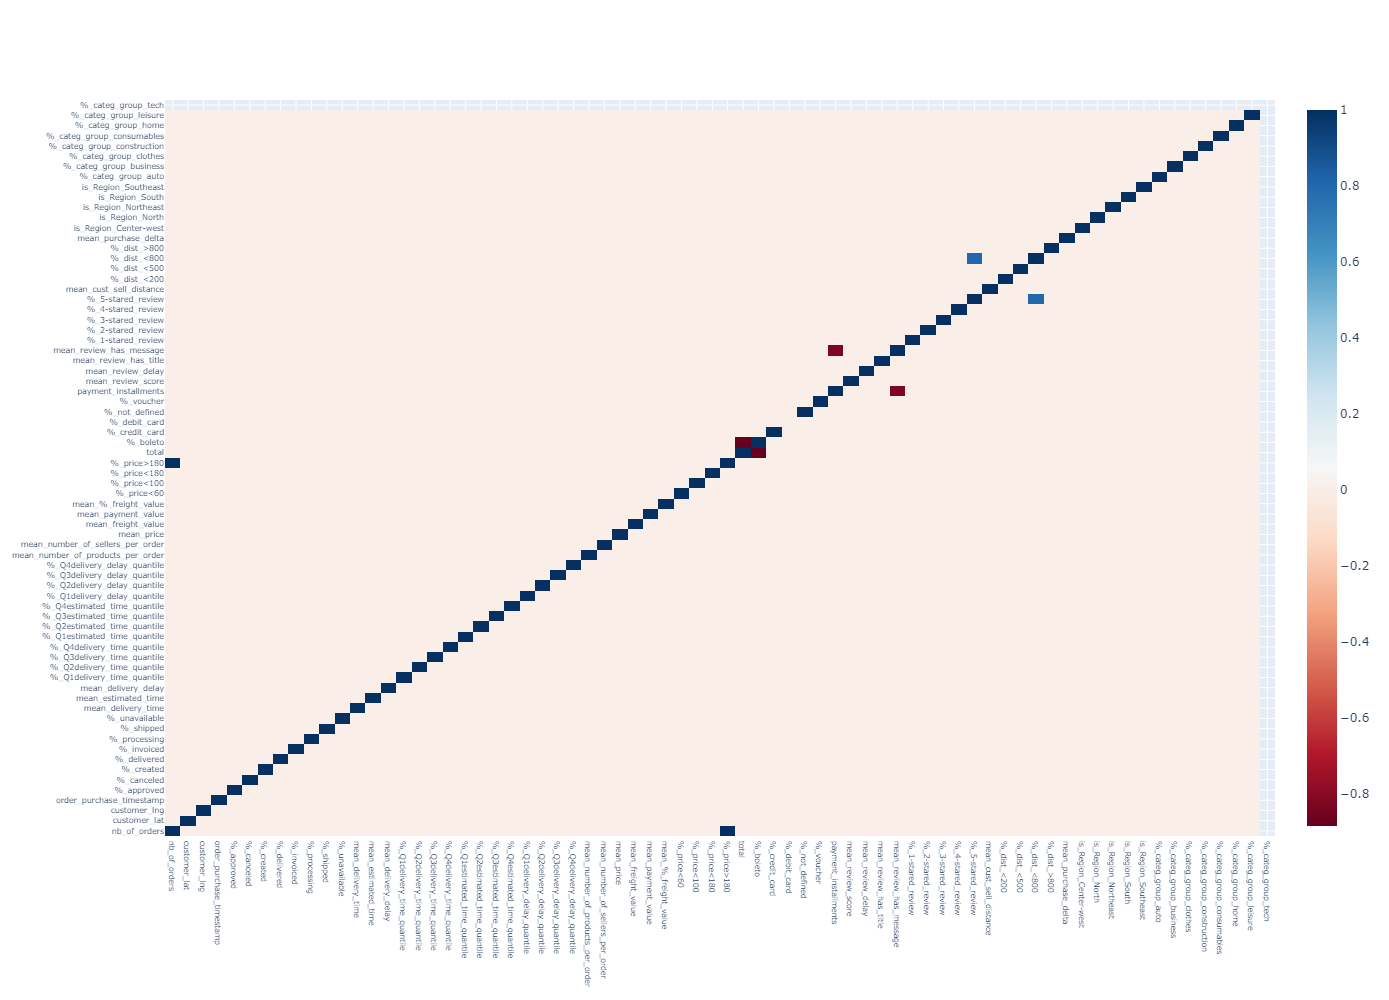

In [179]:
# Enlightening strongest correlations
df_corr = data_cust.corr().applymap(
    lambda x: np.NaN if abs(x) < 0.8 else x).copy().fillna(0)

import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
    z = df_corr, x = data_cust.columns, y = data_cust.columns, colorscale = 'rdbu'
))

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
)
fig.update_xaxes(tickfont = dict(size = 7.5))
fig.update_yaxes(tickfont = dict(size = 7.8))
fig.show()

# Storing aggregated dataset

In [181]:
data_cust.to_pickle('customer_aggregated_data.pkl')